In [ ]:
import requests # type: ignore
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = "https://www.storia.ro/ro/rezultate/vanzare/casa/bucuresti?limit=72&ownerTypeSingleSelect=ALL&by=LATEST&direction=DESC&page={}"


In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 16_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Mobile/15E148 Safari/604.1'}
result = requests.get(url.format(1), headers=headers)


In [ ]:
soup = BeautifulSoup(result.content.decode(), "html.parser")
print(soup.prettify()) 

<!DOCTYPE html>
<html lang="ro">
 <head data-consent="ignore">
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="https://statics.storia.ro/static/storiaro/naspersclassifieds-regional/verticalsre-atlas-web-storiaro/static/img/favicon.ico?v=5" rel="icon"/>
  <link href="https://statics.storia.ro/static/storiaro/naspersclassifieds-regional/verticalsre-atlas-web-storiaro/static/img/app-icon.png" rel="apple-touch-icon"/>
  <link href="https://statics.storia.ro/static/storiaro/naspersclassifieds-regional/verticalsre-atlas-web-storiaro/static/img/app-icon.png" rel="android-touch-icon"/>
  <meta content="1758851897729052" property="fb:app_id"/>
  <meta content="https://statics.storia.ro/static/storiaro/naspersclassifieds-regional/verticalsre-atlas-web-storiaro/static/img/fb/fb-image200x200.png?t=20-11-10" property="og:image"/>
  <meta content="website" property="og:type"/>
  <meta content="https://www.storia.ro/" property="og:url"/>
  <meta content=

In [ ]:
list = []
houses = soup.find_all(attrs={'data-cy':"listing-item-link"})
for house in houses:
    list.append("https://www.storia.ro"+house.get('href'))
   

In [ ]:
pages = int(soup.find_all(attrs={'class':"css-1tospdx"})[-1].get_text())
print(pages)

24


In [ ]:
for page in range(2, pages+1):
    result = requests.get(url.format(page), headers=headers)
    soup = BeautifulSoup(result.content.decode(), "html.parser")
    houses = soup.find_all(attrs={'data-cy':"listing-item-link"})
    for house in houses:
        list.append("https://www.storia.ro"+house.get('href'))


In [ ]:
df = pd.DataFrame(list)
print(df)

                                                      0
0     https://www.storia.ro/ro/oferta/casa-individua...
1     https://www.storia.ro/ro/oferta/vanzari-case-v...
2     https://www.storia.ro/ro/oferta/proprietar-vnd...
3     https://www.storia.ro/ro/oferta/ghencea-vila-i...
4     https://www.storia.ro/ro/oferta/proprietar-pan...
...                                                 ...
1756  https://www.storia.ro/ro/oferta/unirii-vila-bo...
1757  https://www.storia.ro/ro/oferta/vil-cu-6-camer...
1758  https://www.storia.ro/ro/oferta/vila-5-camere-...
1759  https://www.storia.ro/ro/oferta/turda-parc-reg...
1760  https://www.storia.ro/ro/oferta/vila-p-1-singu...

[1761 rows x 1 columns]


In [ ]:
result=df.drop_duplicates(keep="first")
result.to_csv("..\CSVs\Links.csv")
print(result)

                                                      0
0     https://www.storia.ro/ro/oferta/casa-individua...
1     https://www.storia.ro/ro/oferta/vanzari-case-v...
2     https://www.storia.ro/ro/oferta/proprietar-vnd...
3     https://www.storia.ro/ro/oferta/ghencea-vila-i...
4     https://www.storia.ro/ro/oferta/proprietar-pan...
...                                                 ...
1756  https://www.storia.ro/ro/oferta/unirii-vila-bo...
1757  https://www.storia.ro/ro/oferta/vil-cu-6-camer...
1758  https://www.storia.ro/ro/oferta/vila-5-camere-...
1759  https://www.storia.ro/ro/oferta/turda-parc-reg...
1760  https://www.storia.ro/ro/oferta/vila-p-1-singu...

[1689 rows x 1 columns]


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Ana\AppData\Local\Temp\ipykernel_14264\349916016.py:2: SyntaxWarning: invalid escape sequence '\C'
  result.to_csv("..\CSVs\Links.csv")


In [ ]:
df = pd.read_csv("CSVs\Links.csv")
linkList = df.values.tolist()
HouseDataList = []
headers = {'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 16_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Mobile/15E148 Safari/604.1'}


In [ ]:

def scrapeData(url):
    result = requests.get(url, headers=headers)
    soup = BeautifulSoup(result.content.decode(), "html.parser")

    tableValue = []
    tableKeys = []

    Keys = soup.find_all("div", {"data-cy": "table-label-content"})
    tableKeys = [div.text for div in Keys]

    # print(len(tableKeys))
    # print(tableKeys)

    for key in tableKeys:
        tableValue.append(soup.find("div", {"aria-label":key}).text)

    for key in tableKeys:
        tableValue = [value.replace(key, '') for value in tableValue]

    # print(len(tableValue))
    # print(tableValue)

    houseDetails = {}

    # num_attributes_keys = len(tableKeys)
    # num_attributes_values = len(tableValue)

    # print("Number of attributes in keys:", num_attributes_keys)
    # print("Number of attributes in values:", num_attributes_values)


    for key in tableKeys:
        for value in tableValue:
            houseDetails[key] = value
            tableValue.remove(value)
            break

    # print(houseDetails)
    if(soup.find("strong", {"aria-label":"Preț"}) == None):
        price = "N/A"
    else:
        price=soup.find("strong", {"aria-label":"Preț"}).text
        
    houseDetails["Preț"] = price

    HouseDataList.append(houseDetails)

    # print(HouseDataList)


In [ ]:

for i in range(len(linkList)):
    scrapeData(linkList[i][1])


In [ ]:

DataSet = pd.DataFrame(HouseDataList)
DataSet.to_csv(r"C:\Users\Ana\Desktop\House-pricing-prediction-master\CSVs\UneditedDataSetSoup--tab-separated.csv", encoding="utf-16", sep='\t')
DataSet.to_csv(r"C:\Users\Ana\Desktop\House-pricing-prediction-master\CSVs\UneditedDataSetSoup.csv", encoding="utf-16")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv(r"C:\Users\Ana\Desktop\House-pricing-prediction-master\CSVs\UneditedDataSetSoup.csv", encoding="utf-16")

In [ ]:
df1.to_csv(r"C:\Users\Ana\Desktop\House-pricing-prediction-master\CSVs\DataSet.csv", mode="a",index=False, encoding="utf-16")
df=pd.read_csv(r"C:\Users\Ana\Desktop\House-pricing-prediction-master\CSVs\DataSet.csv", encoding="utf-16")

#display(df)

In [ ]:
df=df.drop_duplicates(keep='first')
df = df.dropna(subset=['Preț'])
df=df.drop(columns=["Unnamed: 0"])
df = df.replace('Cere informații', pd.NA)
df = df.replace('fără informații', pd.NA)
df=df.drop_duplicates(keep='first')
df = df[df['Preț'] != 'Preț']

display(df)


,Suprafață utilă,Tip încălzire,Suprafață teren (m²),Stare,Tip clădire,Anul construcției,Numărul de camere,Garaj/loc de parcare,Vizionare la distanță,Chirie,...,Acoperis,Tip mansardă,Media,Siguranță,Tip gard,Tip acces,Locație,Imprejurimi,Informații suplimentare,Preț
0,344 m²,"pompa de caldura, sobă",344 m²,gata de utilizare,curte comuna,1935,6,<NA>,<NA>,<NA>,...,metalic,fara,"cablu tv, electricitate, conducta de gaz, inte...",curte,beton,asfaltat,urbana,lac,aer condiționat,481 600 €
1,168 m²,centrală pe gaz,129 m²,gata de utilizare,singur in curte,1940,7,<NA>,<NA>,<NA>,...,metalic,utilizabilă,"cablu tv, electricitate, conducta de gaz, inte...","ușă metalică, curte, obloane",lemn,asfaltat,urbana,<NA>,"mansardă, beci",349 600 €
2,117 m²,centrală pe gaz,175 m²,gata de utilizare,case insiruite,2015,3,<NA>,<NA>,<NA>,...,tigla,utilizabilă,"cablu tv, electricitate, conducta de gaz, inte...","ușă metalică, curte",cărămidă,<NA>,urbana,<NA>,"aer condiționat, mansardă, beci",140 000 €
3,890 m²,<NA>,677 m²,necesită renovare,<NA>,1922,mai mult de 10,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,mansardă,880 000 €
4,70 m²,<NA>,120 m²,gata de utilizare,singur in curte,1960,3,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,64 000 €
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,165 m²,"centrală pe gaz, centralizat",165 m²,<NA>,singur in curte,2023,5,<NA>,<NA>,<NA>,...,<NA>,<NA>,"internet, electricitate, canalizare, apă curentă",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,350 000 €
5117,104 m²,<NA>,104 m²,<NA>,<NA>,<NA>,4,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,165 000 €
5276,310 m²,"centrală pe gaz, centralizat",167 m²,gata de utilizare,singur in curte,2004,9,<NA>,Video,<NA>,...,<NA>,<NA>,"internet, electricitate, canalizare, apă curentă",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,545 000 €
5311,300 m²,centrală pe gaz,60 m²,<NA>,<NA>,1950,mai mult de 10,<NA>,<NA>,<NA>,...,<NA>,<NA>,"electricitate, canalizare, apă curentă",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,320 000 €


In [ ]:
df.to_csv(r"..\CSVs\CATData.csv", encoding="utf-16" )
df.to_csv(r"..\CSVs\CATData--tab-separated.csv", encoding="utf-16", sep="\t" )

In [ ]:
df=pd.read_csv(r"..\CSVs\CATData.csv", encoding="utf-16", index_col=0)

df["Informații suplimentare"] = df["Informații suplimentare"].map(lambda x: 1 if isinstance(x, str) and "aer condiționat" in x else 0)
df["Tip mansardă"] = df["Tip mansardă"].map(lambda x: x if isinstance(x, str) and ("utilizabilă" in x or "neutilizabilă" in x) else pd.NA)
df["Numar de etaje"] = df["Numar de etaje"].map(lambda x: 1 if isinstance(x, str) and "un nivel" in x else x)
df["Numar de etaje"] = df["Numar de etaje"].map(lambda x: 2 if isinstance(x, str) and "2 etaje" in x else x)
df["Numar de etaje"] = df["Numar de etaje"].map(lambda x: "3" if isinstance(x, str) and "3 sau mai multe" in x else x)
df["Numar de etaje"] = df["Numar de etaje"].map(lambda x: np.nan if isinstance(x, str) and "da" in x else x)

df = df.rename(columns={"Informații suplimentare": "Aer condiționat"})
df = df.drop(["Tip clădire","Vizionare la distanță", "Chirie", "Tip vânzător", "Liber de la", "Casa de vacanta", "Media", "Siguranță", "Imprejurimi", "Tip gard", "Tip geamuri"], axis= 1)
df["Numărul de camere"] = df["Numărul de camere"].replace("mai mult de 10", '10')

df = df.map(lambda x: x.replace(" m²", "") if isinstance(x, str) else x)
df = df.map(lambda x: x.replace(" €", "") if isinstance(x, str) else x)
df = df.map(lambda x: x.replace(" RON", "") if isinstance(x, str) else x)
df = df.map(lambda x: x.replace(".", "-") if isinstance(x, str) else x)
df = df.map(lambda x: x.replace(",", ".") if isinstance(x, str) else x)
df = df.map(lambda x: x.replace("-", "") if isinstance(x, str) else x)

display(df)

,Suprafață utilă,Tip încălzire,Suprafață teren (m²),Stare,Anul construcției,Numărul de camere,Garaj/loc de parcare,Tip proprietate,Material de construcție,Numar de etaje,Tip acoperis,Acoperis,Tip mansardă,Tip acces,Locație,Aer condiționat,Preț
0,344,pompa de caldura. sobă,344,gata de utilizare,1935.0,6,NaN,locuință utilizată,altul,1,fara,metalic,<NA>,asfaltat,urbana,1,481 600
1,168,centrală pe gaz,129,gata de utilizare,1940.0,7,NaN,locuință utilizată,cărămidă,1,oblic,metalic,utilizabilă,asfaltat,urbana,0,349 600
2,117,centrală pe gaz,175,gata de utilizare,2015.0,3,NaN,locuință utilizată,NaN,1,oblic,tigla,utilizabilă,NaN,urbana,1,140 000
3,890,NaN,677,necesită renovare,1922.0,10,NaN,locuință utilizată,NaN,1,NaN,NaN,<NA>,NaN,NaN,0,880 000
4,70,NaN,120,gata de utilizare,1960.0,3,NaN,locuință nouă,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,0,64 000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,165,centrală pe gaz. centralizat,165,NaN,2023.0,5,NaN,locuință nouă,NaN,1,NaN,NaN,<NA>,NaN,NaN,0,350 000
5117,104,NaN,104,NaN,NaN,4,NaN,locuință utilizată,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,0,165 000
5276,310,centrală pe gaz. centralizat,167,gata de utilizare,2004.0,9,NaN,locuință nouă,NaN,1,NaN,NaN,<NA>,NaN,NaN,0,545 000
5311,300,centrală pe gaz,60,NaN,1950.0,10,NaN,locuință utilizată,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,0,320 000


In [ ]:
def replaceCategoriesWithNumbers():
    categoryDict = {}

    for column in df:
        if(not df[column].astype(str).str.contains(r'\d', na=False).any()):
            columnCategories = pd.Categorical(df[column])

            columnDict = {}
        
            for index, category in enumerate(columnCategories.categories):
                columnDict[category] = index + 1

            categoryDict[column] = columnDict

    for column in categoryDict:
        for label in categoryDict[column]:
            df[column] = df[column].replace(label, categoryDict[column][label])


    return categoryDict

In [ ]:
categoryDict = replaceCategoriesWithNumbers()
categoryDict

{'Tip încălzire': {'centrala pe carbune. centrală pe gaz': 1,
  'centralizat': 2,
  'centrală electrică': 3,
  'centrală electrică. centrală pe gaz': 4,
  'centrală electrică. centrală pe gaz. panouri solare': 5,
  'centrală electrică. centrală pe gaz. pompa de caldura': 6,
  'centrală pe gaz': 7,
  'centrală pe gaz. centralizat': 8,
  'centrală pe gaz. panouri solare': 9,
  'centrală pe gaz. pompa de caldura': 10,
  'centrală pe gaz. sobă': 11,
  'panouri solare': 12,
  'pompa de caldura': 13,
  'pompa de caldura. panouri solare': 14,
  'pompa de caldura. sobă': 15,
  'semineu. centrală pe gaz': 16,
  'semineu. centrală pe gaz. panouri solare': 17,
  'semineu. centrală pe gaz. panouri solare. centralizat': 18,
  'sistem geotermal. pompa de caldura': 19,
  'sobă': 20,
  'sobă. centrala pe carbune': 21,
  'sobă. centrală pe gaz': 22,
  'sobă. centrală pe gaz. centralizat': 23},
 'Stare': {'gata de utilizare': 1,
  'necesită renovare': 2,
  'în construcție': 3,
  'în construcție  faza av

In [ ]:
df = df.map(lambda x: x.replace(" ", "") if isinstance(x, str) else x)
df = df.map(lambda x: float(x) if isinstance(x, str) else x)

In [ ]:
display(df)
display(df.describe())

df.to_csv(r"..\CSVs\EditedData.csv", encoding="utf-16")
df.to_csv(r"..\CSVs\EditedData--tab-separated.csv", encoding="utf-16", sep="\t")

,Suprafață utilă,Tip încălzire,Suprafață teren (m²),Stare,Anul construcției,Numărul de camere,Garaj/loc de parcare,Tip proprietate,Material de construcție,Numar de etaje,Tip acoperis,Acoperis,Tip mansardă,Tip acces,Locație,Aer condiționat,Preț
0,344.0,15.0,344.0,1.0,1935.0,6.0,NaN,3.0,1.0,1.0,3.0,4.0,<NA>,1.0,5.0,1,481600.0
1,168.0,7.0,129.0,1.0,1940.0,7.0,NaN,3.0,7.0,1.0,5.0,4.0,2,1.0,5.0,0,349600.0
2,117.0,7.0,175.0,1.0,2015.0,3.0,NaN,3.0,NaN,1.0,5.0,7.0,2,NaN,5.0,1,140000.0
3,890.0,NaN,677.0,2.0,1922.0,10.0,NaN,3.0,NaN,1.0,NaN,NaN,<NA>,NaN,NaN,0,880000.0
4,70.0,NaN,120.0,1.0,1960.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,0,64000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,165.0,8.0,165.0,NaN,2023.0,5.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,350000.0
5117,104.0,NaN,104.0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,165000.0
5276,310.0,8.0,167.0,1.0,2004.0,9.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,545000.0
5311,300.0,7.0,60.0,NaN,1950.0,10.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,320000.0


,Suprafață utilă,Tip încălzire,Suprafață teren (m²),Stare,Anul construcției,Numărul de camere,Garaj/loc de parcare,Tip proprietate,Material de construcție,Numar de etaje,Tip acoperis,Acoperis,Tip acces,Locație,Aer condiționat,Preț
count,3018.000000,2172.000000,3016.000000,1791.000000,2556.00000,3018.000000,405.0,2998.000000,717.000000,1628.000000,451.000000,634.000000,732.000000,463.000000,3018.000000,3.018000e+03
mean,309.068751,7.537753,528.016436,1.179229,1990.15493,5.465209,1.0,2.399600,6.019526,1.103194,5.048780,4.848580,1.592896,4.930886,0.111001,4.899496e+05
std,2378.374460,1.960680,7685.023753,0.457994,35.81030,2.301219,0.0,0.579162,2.231606,0.398725,0.641053,1.977545,1.663433,0.405023,0.314185,6.970791e+05
min,1.000000,1.000000,1.000000,1.000000,1818.00000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,7.400000e+03
25%,125.000000,7.000000,165.000000,1.000000,1960.00000,4.000000,1.0,2.000000,4.000000,1.000000,5.000000,4.000000,1.000000,5.000000,0.000000,1.650000e+05
50%,186.000000,7.000000,250.000000,1.000000,2006.00000,5.000000,1.0,2.000000,7.000000,1.000000,5.000000,4.000000,1.000000,5.000000,0.000000,2.900000e+05
75%,320.000000,8.000000,364.000000,1.000000,2020.00000,7.000000,1.0,3.000000,7.000000,1.000000,5.000000,7.000000,1.000000,5.000000,0.000000,5.500000e+05
max,130000.000000,23.000000,340000.000000,5.000000,2025.00000,10.000000,1.0,4.000000,12.000000,3.000000,7.000000,9.000000,8.000000,5.000000,1.000000,1.470360e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3018 entries, 0 to 5348
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Suprafață utilă          3018 non-null   float64
 1   Tip încălzire            2172 non-null   float64
 2   Suprafață teren (m²)     3016 non-null   float64
 3   Stare                    1791 non-null   float64
 4   Anul construcției        2556 non-null   float64
 5   Numărul de camere        3018 non-null   float64
 6   Garaj/loc de parcare     405 non-null    float64
 7   Tip proprietate          2998 non-null   float64
 8   Material de construcție  717 non-null    float64
 9   Numar de etaje           1628 non-null   float64
 10  Tip acoperis             451 non-null    float64
 11  Acoperis                 634 non-null    float64
 12  Tip mansardă             280 non-null    object 
 13  Tip acces                732 non-null    float64
 14  Locație                  463 

In [ ]:
dfFinalizat = df[df["Stare"] == 1]
dfFinalizat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 0 to 5348
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Suprafață utilă          1516 non-null   float64
 1   Tip încălzire            1211 non-null   float64
 2   Suprafață teren (m²)     1514 non-null   float64
 3   Stare                    1516 non-null   float64
 4   Anul construcției        1451 non-null   float64
 5   Numărul de camere        1516 non-null   float64
 6   Garaj/loc de parcare     202 non-null    float64
 7   Tip proprietate          1515 non-null   float64
 8   Material de construcție  434 non-null    float64
 9   Numar de etaje           887 non-null    float64
 10  Tip acoperis             363 non-null    float64
 11  Acoperis                 423 non-null    float64
 12  Tip mansardă             222 non-null    object 
 13  Tip acces                456 non-null    float64
 14  Locație                  361 

In [ ]:
newColumns = ['Suprafață utilă', 'Tip încălzire', 'Suprafață teren (m²)',
       'Anul construcției', 'Numărul de camere',
       'Aer condiționat', 'Preț']

In [ ]:
dfShort = dfFinalizat[newColumns]

In [ ]:
dfShort.dropna(inplace=True)

for col in dfShort:
    dfShort[col] = dfShort[col].map(lambda x: float(x) if isinstance(x, str) else x)

C:\Users\Ana\AppData\Local\Temp\ipykernel_4748\832763323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfShort.dropna(inplace=True)
C:\Users\Ana\AppData\Local\Temp\ipykernel_4748\832763323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfShort[col] = dfShort[col].map(lambda x: float(x) if isinstance(x, str) else x)


In [ ]:
dfShort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 5276
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Suprafață utilă       1154 non-null   float64
 1   Tip încălzire         1154 non-null   float64
 2   Suprafață teren (m²)  1154 non-null   float64
 3   Anul construcției     1154 non-null   float64
 4   Numărul de camere     1154 non-null   float64
 5   Aer condiționat       1154 non-null   int64  
 6   Preț                  1154 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 72.1 KB


In [ ]:
dfFinalizat.drop(["Stare"], axis= 1, inplace=True)

C:\Users\Ana\AppData\Local\Temp\ipykernel_4748\3452194522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFinalizat.drop(["Stare"], axis= 1, inplace=True)


In [ ]:
dfFinalizat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 0 to 5348
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Suprafață utilă          1516 non-null   float64
 1   Tip încălzire            1211 non-null   float64
 2   Suprafață teren (m²)     1514 non-null   float64
 3   Anul construcției        1451 non-null   float64
 4   Numărul de camere        1516 non-null   float64
 5   Garaj/loc de parcare     202 non-null    float64
 6   Tip proprietate          1515 non-null   float64
 7   Material de construcție  434 non-null    float64
 8   Numar de etaje           887 non-null    float64
 9   Tip acoperis             363 non-null    float64
 10  Acoperis                 423 non-null    float64
 11  Tip mansardă             222 non-null    object 
 12  Tip acces                456 non-null    float64
 13  Locație                  361 non-null    float64
 14  Aer condiționat          1516

<Axes: >

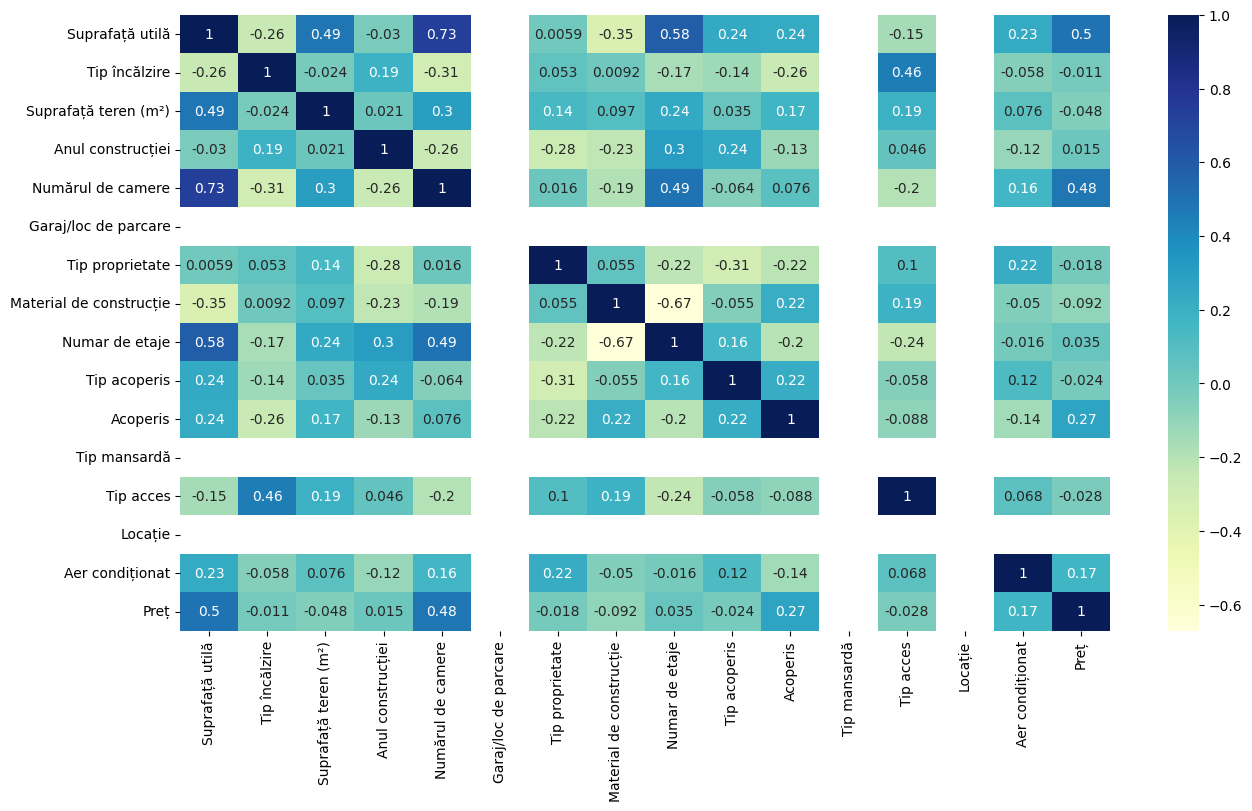

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dfFinalizat.dropna().corr(), cmap="YlGnBu", annot=True)

In [ ]:
dfShort.info()
dfShort.to_csv(r"..\CSVs\ReadyToLiveSetSoup.csv", encoding="utf-16", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 5276
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Suprafață utilă       1154 non-null   float64
 1   Tip încălzire         1154 non-null   float64
 2   Suprafață teren (m²)  1154 non-null   float64
 3   Anul construcției     1154 non-null   float64
 4   Numărul de camere     1154 non-null   float64
 5   Aer condiționat       1154 non-null   int64  
 6   Preț                  1154 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 72.1 KB


<Axes: >

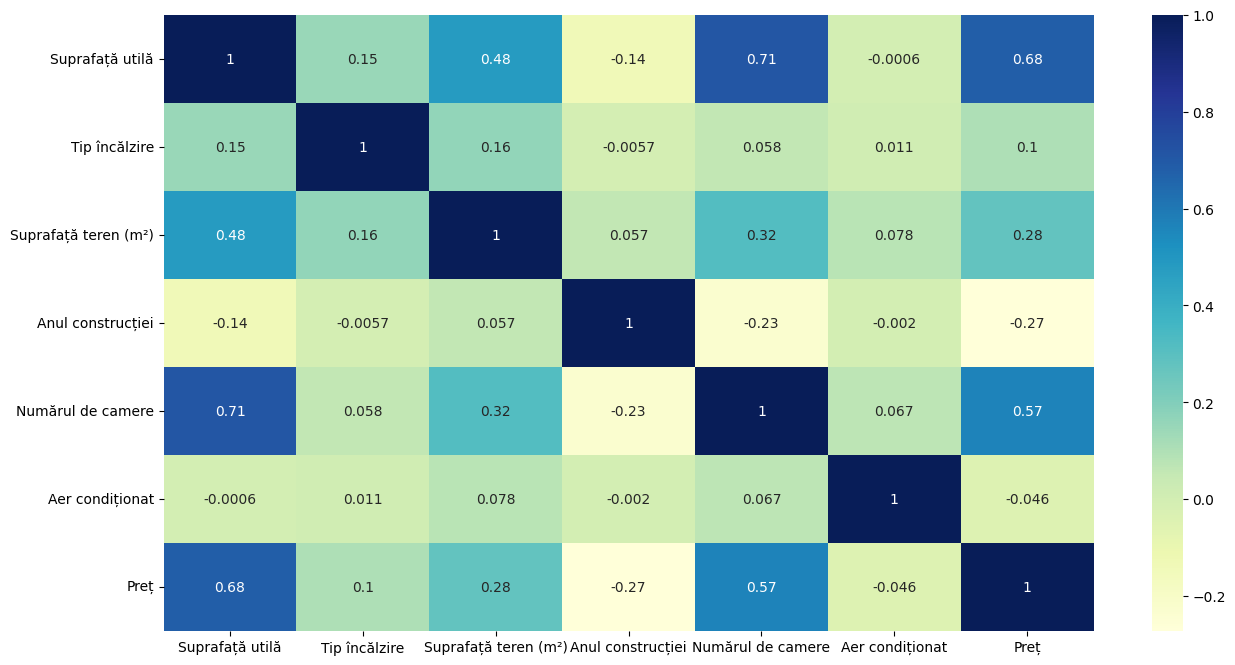

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dfShort.corr(), cmap="YlGnBu", annot=True)

In [ ]:
for col in df:
    df[col].ffill(inplace=True)

df.drop(["Garaj/loc de parcare"], axis= 1, inplace=True)

<Axes: >

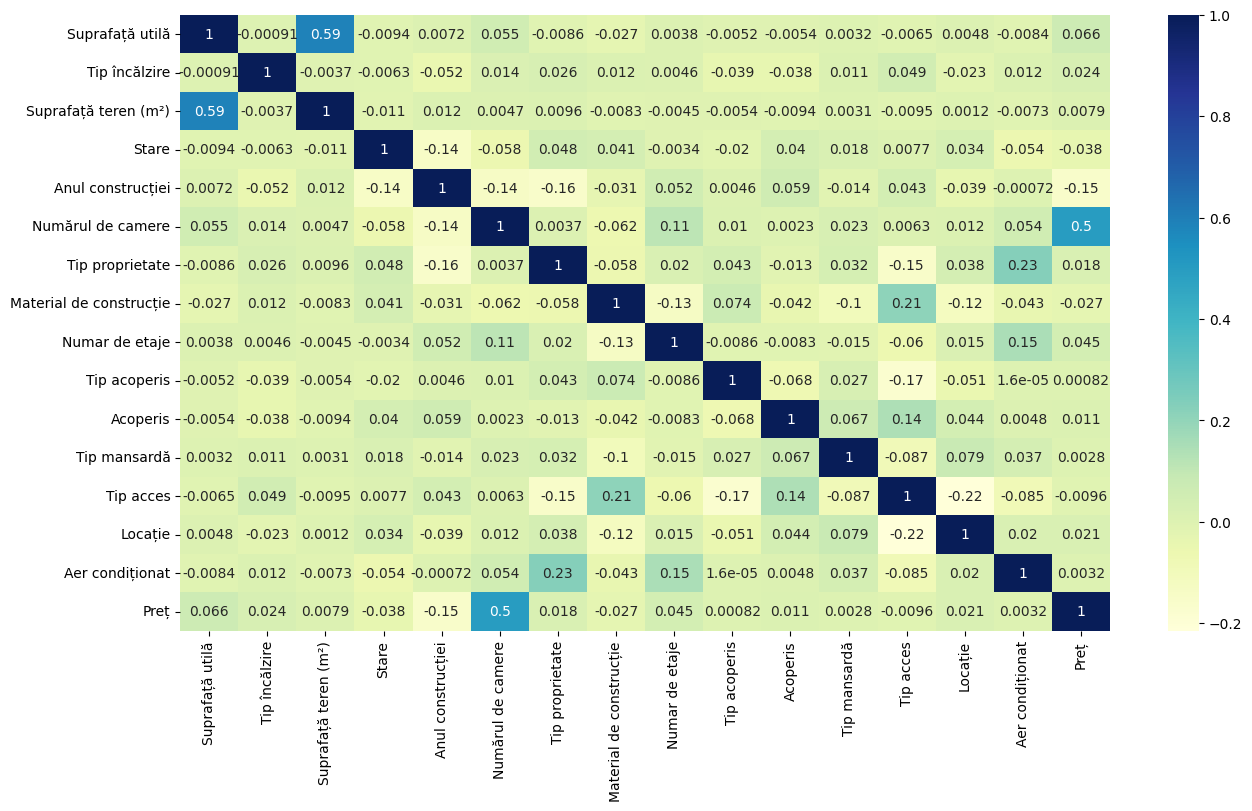

In [ ]:
correlationMatrix = df.dropna().corr()
correlationMatrix.Preț

plt.figure(figsize=(15,8))
sns.heatmap(correlationMatrix, cmap="YlGnBu", annot=True)

In [ ]:
def replaceNumbersWithCategories(df):
    for column in categoryDict:
        for label in categoryDict[column]:
            df[column] = df[column].replace(categoryDict[column][label], label)
        df[column] = df[column].replace(0, "Neprecizat")

In [ ]:
df = pd.read_csv(r"..\CSVs\EditedData.csv", encoding="utf-16", index_col=0)

dfWithLabels = df.copy()

replaceNumbersWithCategories(dfWithLabels)

dfWithLabels.to_csv(r"..\CSVs\EditedData--with-categories.csv", encoding="utf-16")

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
sns.set_theme()

(0.0, 5000000.0)

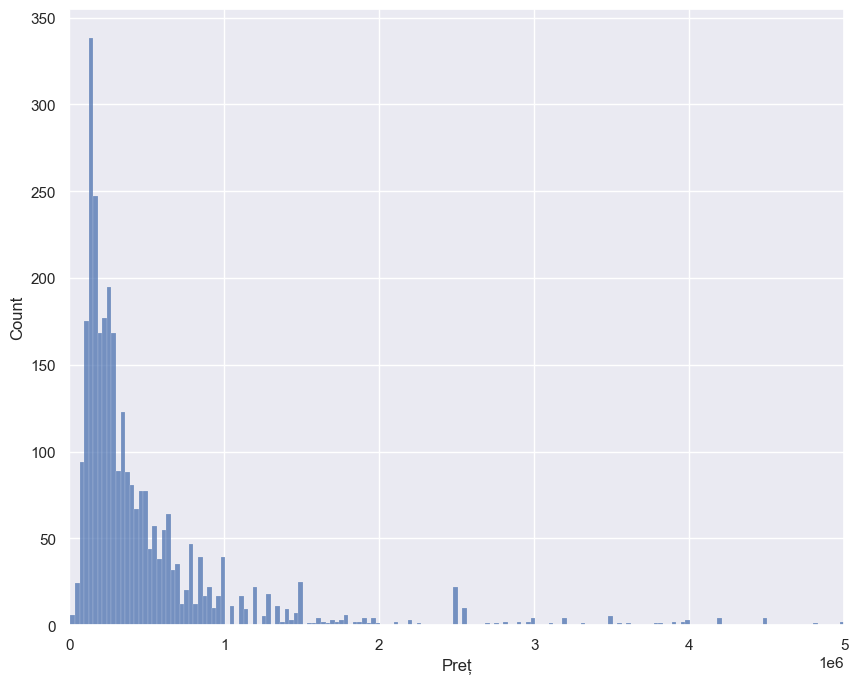

In [ ]:
sns.histplot(df['Preț'], kde=False, bins=500)
plt.xlim(0, 1e7 * 0.5)


<Axes: xlabel='Suprafață utilă', ylabel='Preț'>

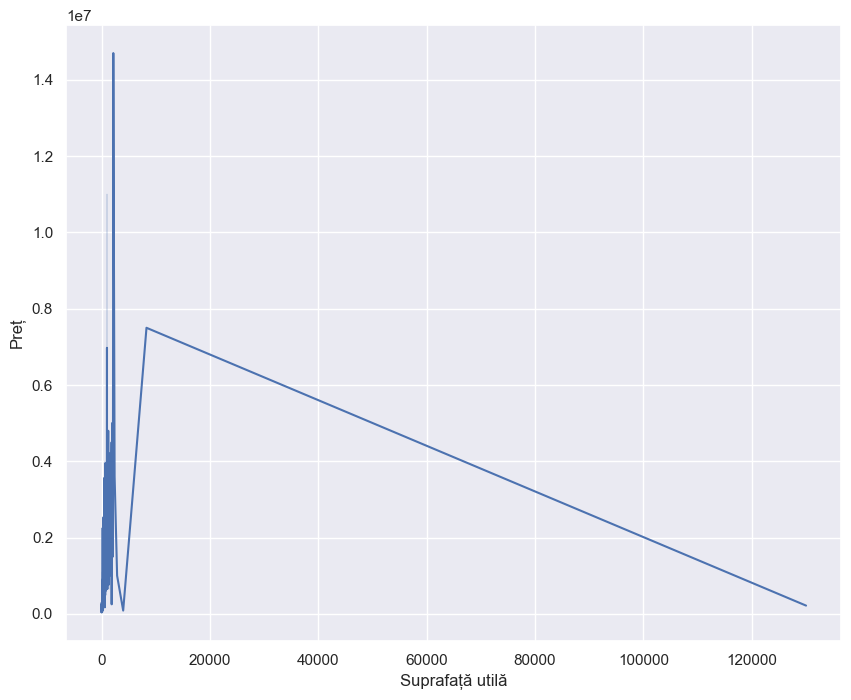

In [ ]:
sns.lineplot(x="Suprafață utilă", y="Preț", data=df)

<Axes: xlabel='Preț', ylabel='Tip încălzire'>

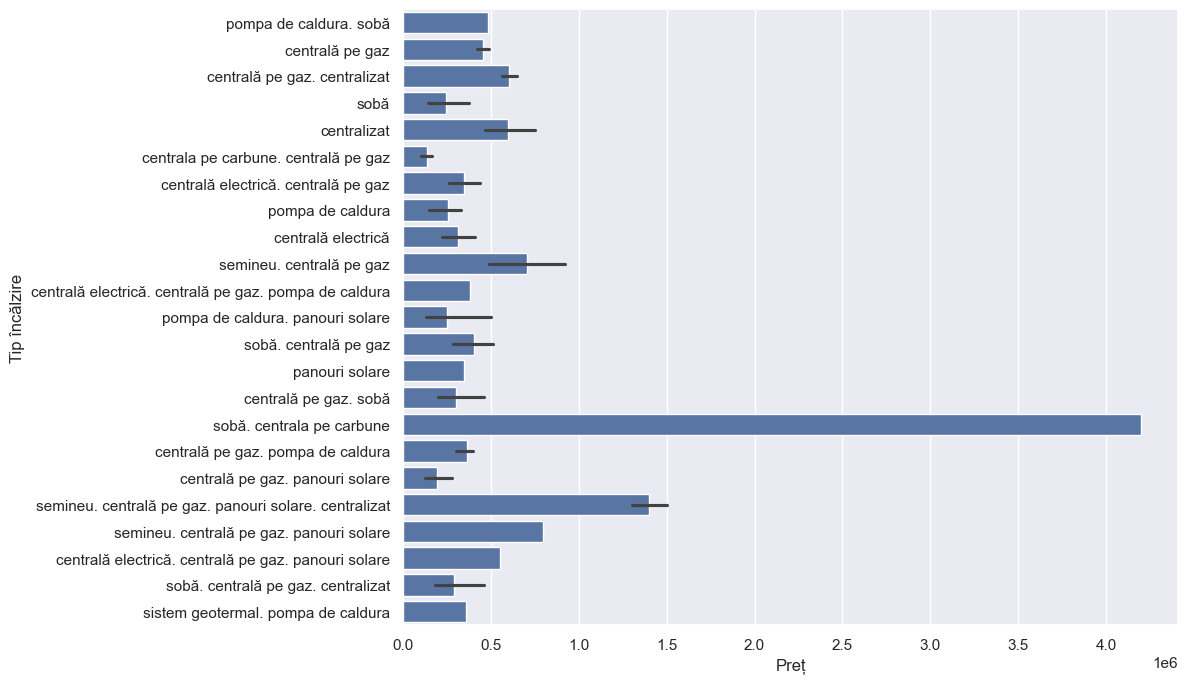

In [ ]:
sns.barplot(x="Preț", y="Tip încălzire", data=dfWithLabels)

(0.0, 3500.0)

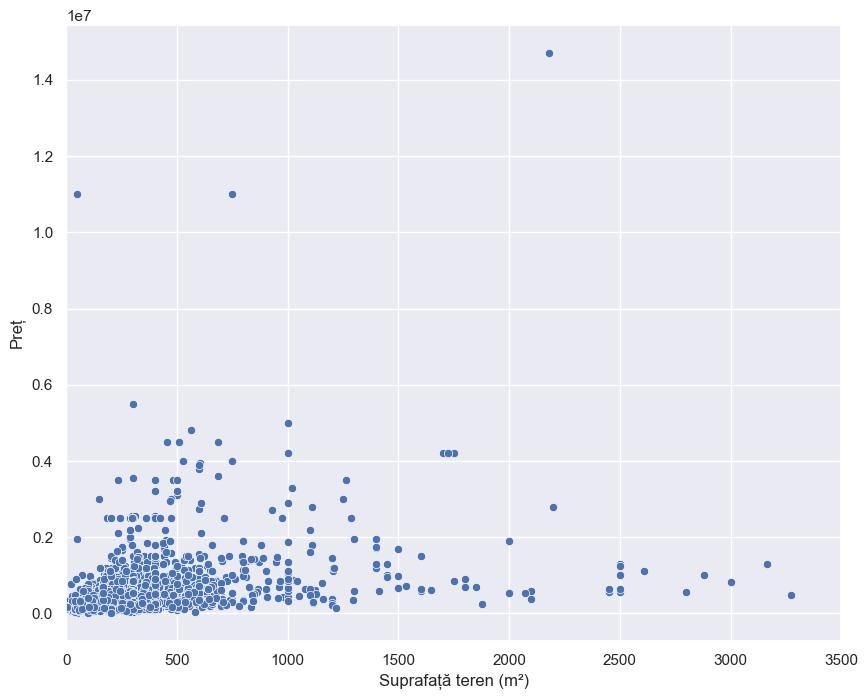

In [ ]:
sns.scatterplot(x="Suprafață teren (m²)", y="Preț", data=df)
plt.xlim(0, 3500)

<Axes: xlabel='Preț', ylabel='Stare'>

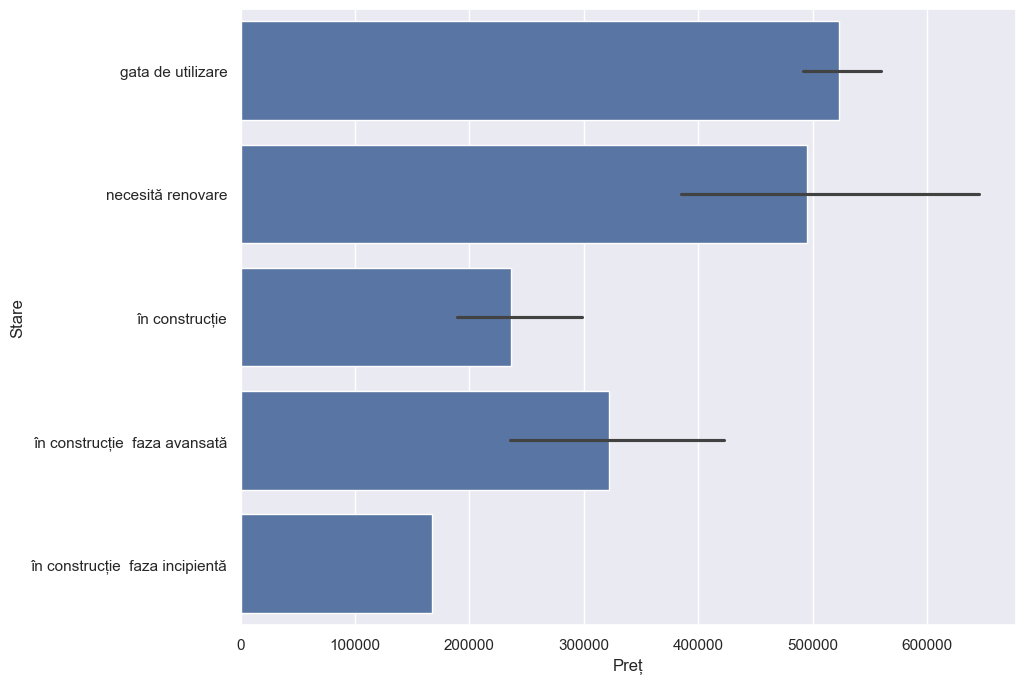

In [ ]:
sns.barplot(x="Preț", y="Stare", data=dfWithLabels)

(1850.0, 2050.0)

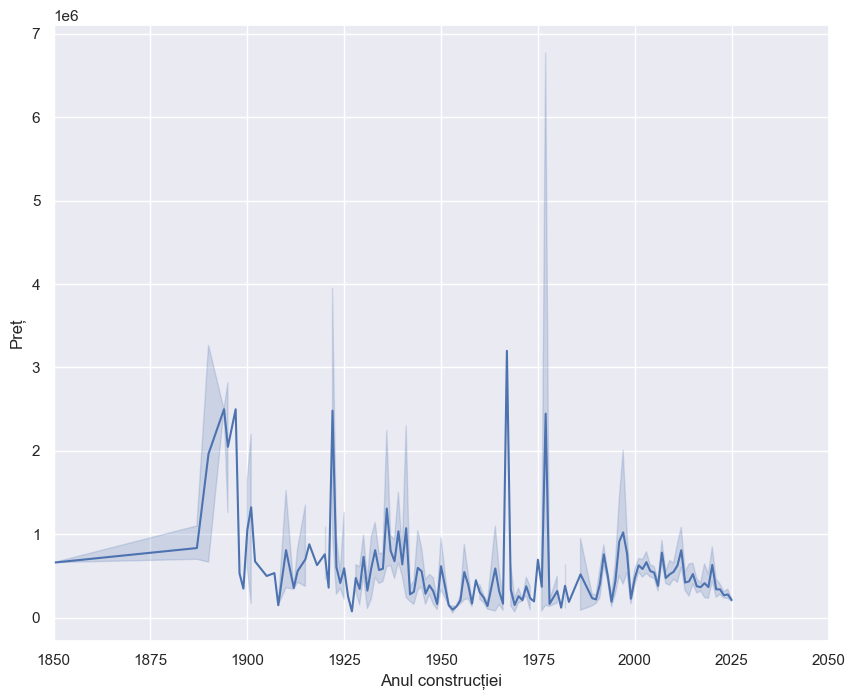

In [ ]:
x = sns.lineplot(x="Anul construcției", y="Preț", data=df)
plt.xlim(1850, 2050)

<Axes: xlabel='Numărul de camere', ylabel='Preț'>

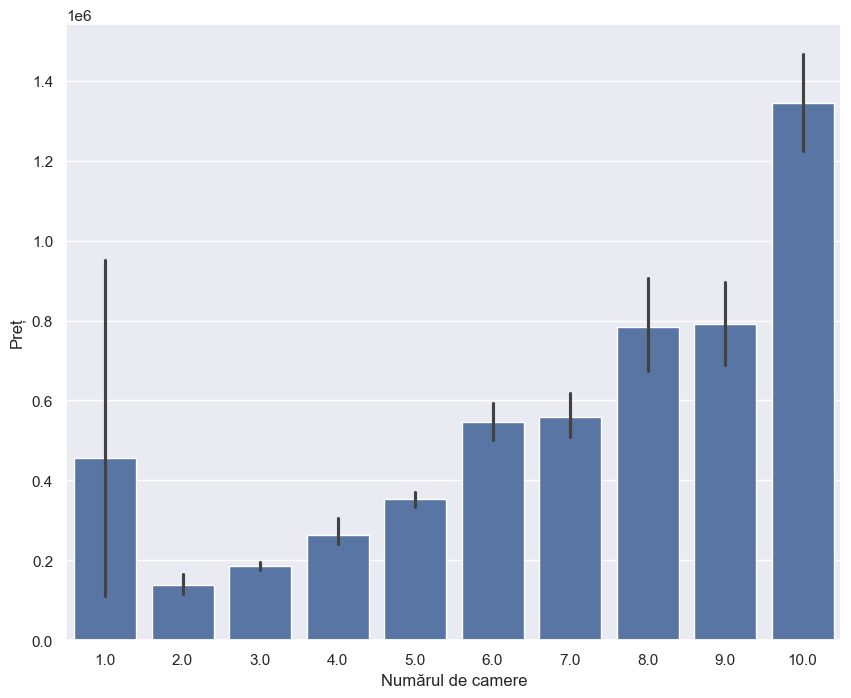

In [ ]:
sns.barplot(x="Numărul de camere", y="Preț", data=df)

<Axes: xlabel='Garaj/loc de parcare', ylabel='Preț'>

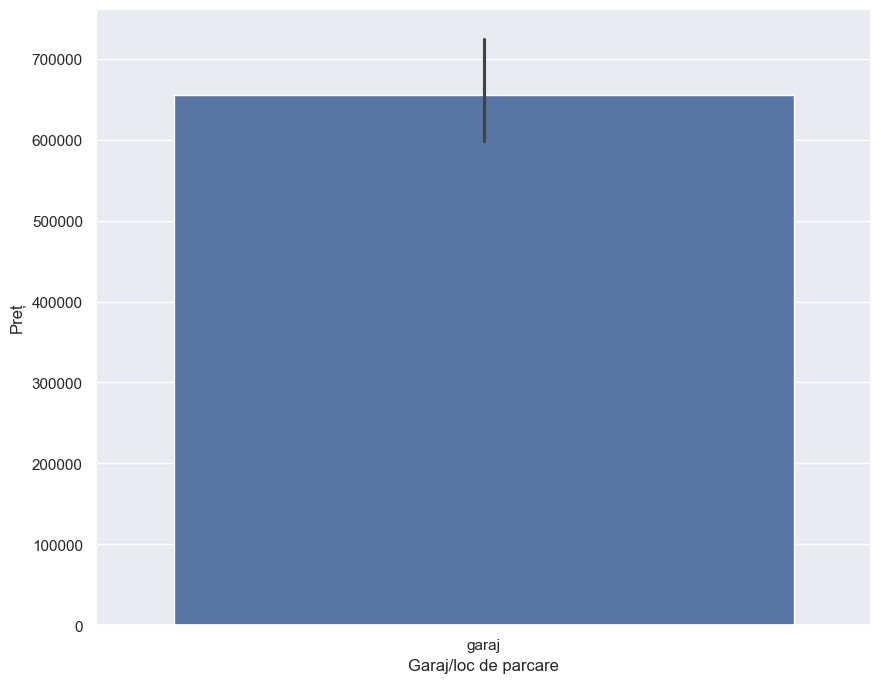

In [ ]:
sns.barplot(x="Garaj/loc de parcare", y="Preț", data=dfWithLabels)

<Axes: xlabel='Tip proprietate', ylabel='Preț'>

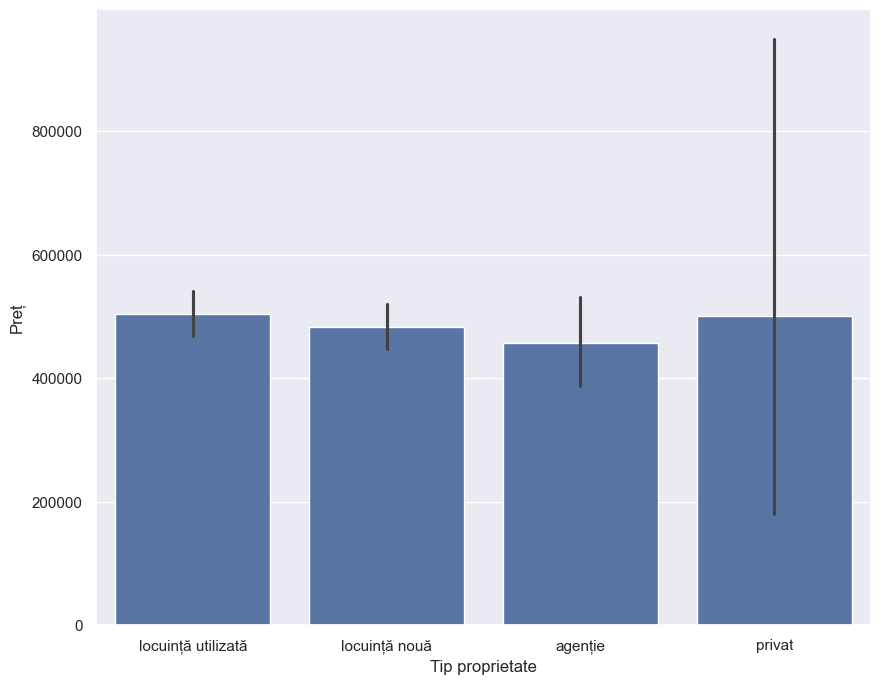

In [ ]:
sns.barplot(x="Tip proprietate", y="Preț", data=dfWithLabels)

<Axes: xlabel='Preț', ylabel='Material de construcție'>

) missing from current font.\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


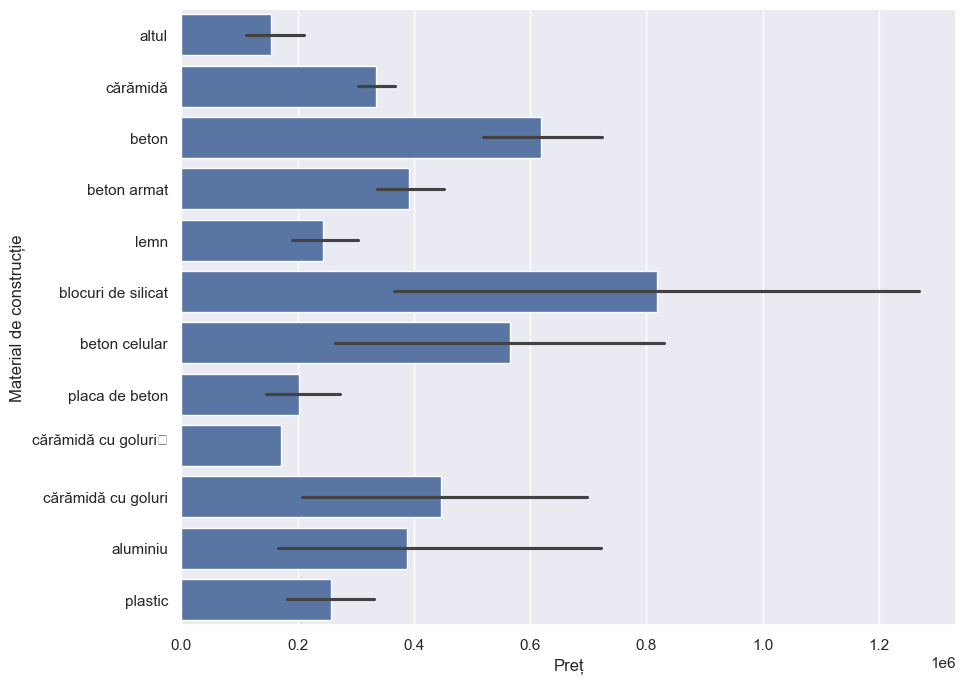

In [ ]:
sns.barplot(x="Preț", y="Material de construcție", data=dfWithLabels)

<Axes: xlabel='Numar de etaje', ylabel='Preț'>

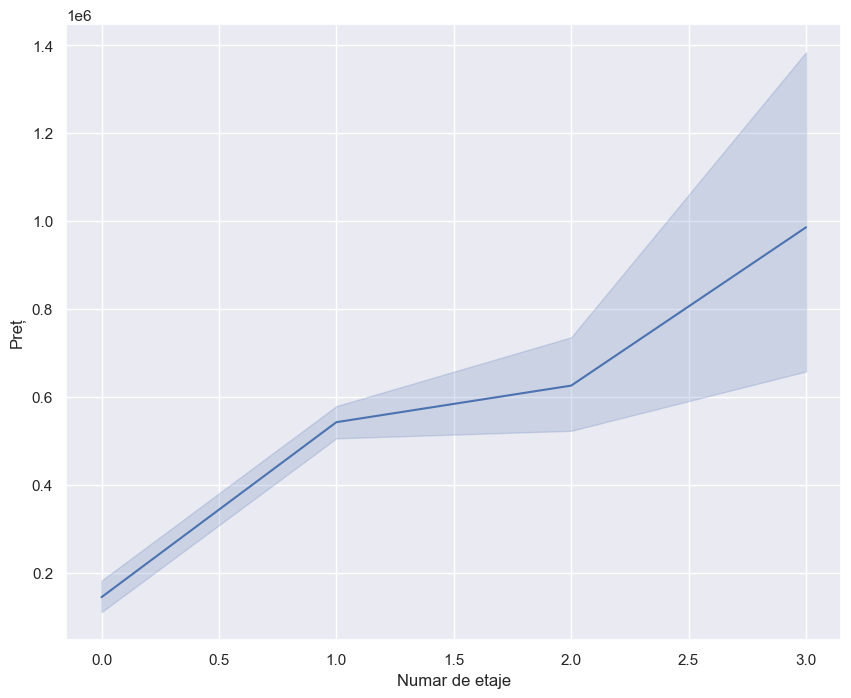

In [ ]:
sns.lineplot(x="Numar de etaje", y="Preț", data=dfWithLabels)

<Axes: xlabel='Tip acoperis', ylabel='Preț'>

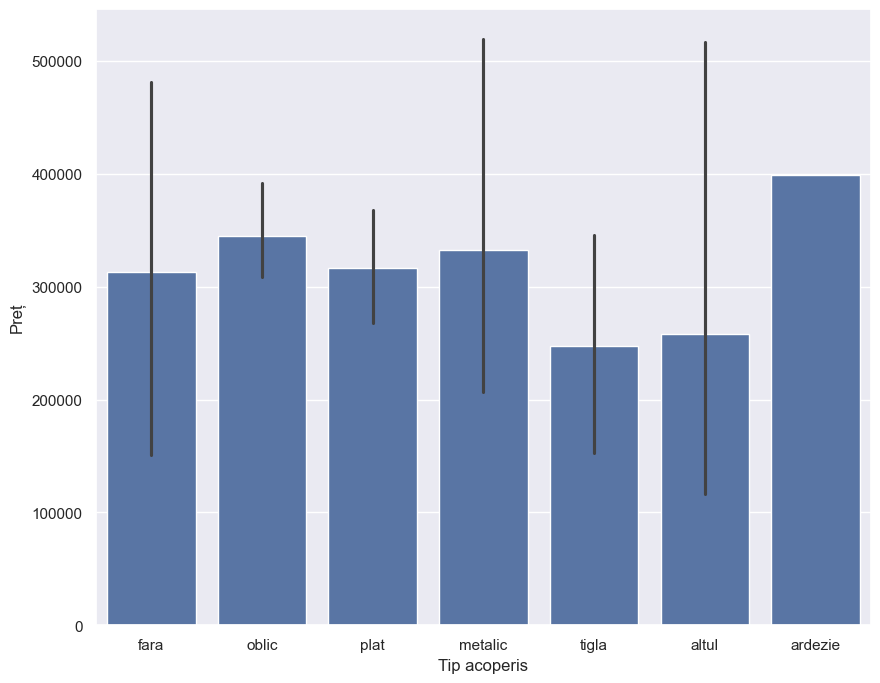

In [ ]:
sns.barplot(x="Tip acoperis", y="Preț", data=dfWithLabels)

<Axes: xlabel='Acoperis', ylabel='Preț'>

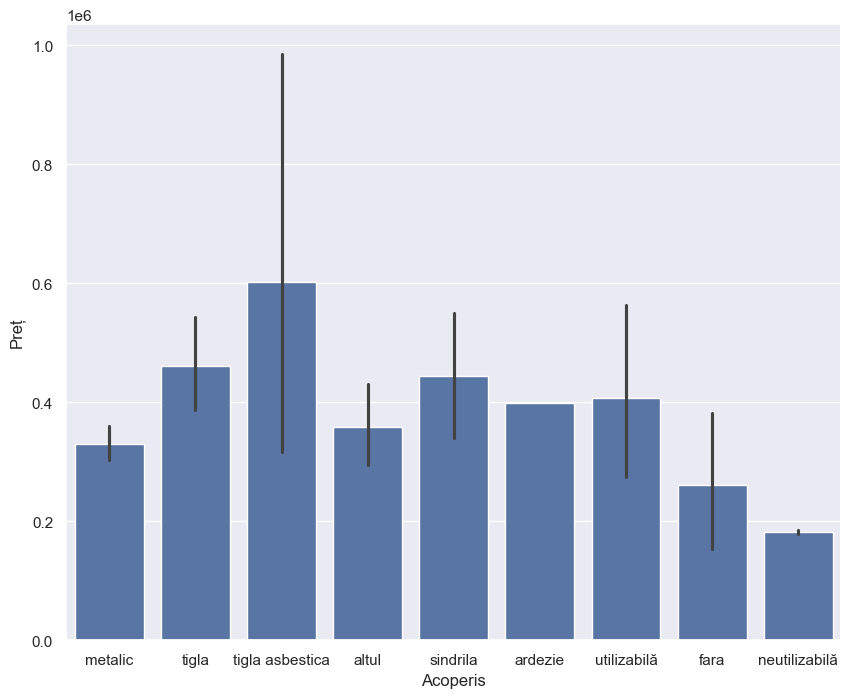

In [ ]:
sns.barplot(x="Acoperis", y="Preț", data=dfWithLabels)

<Axes: xlabel='Tip mansardă', ylabel='Preț'>

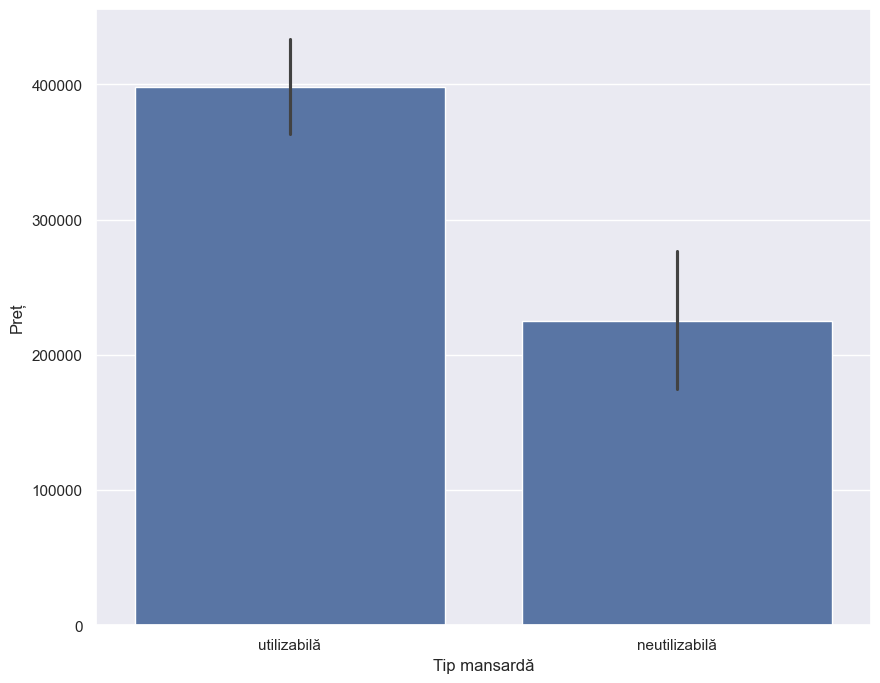

In [ ]:
sns.barplot(x="Tip mansardă", y="Preț", data=dfWithLabels)

<Axes: xlabel='Preț', ylabel='Tip acces'>

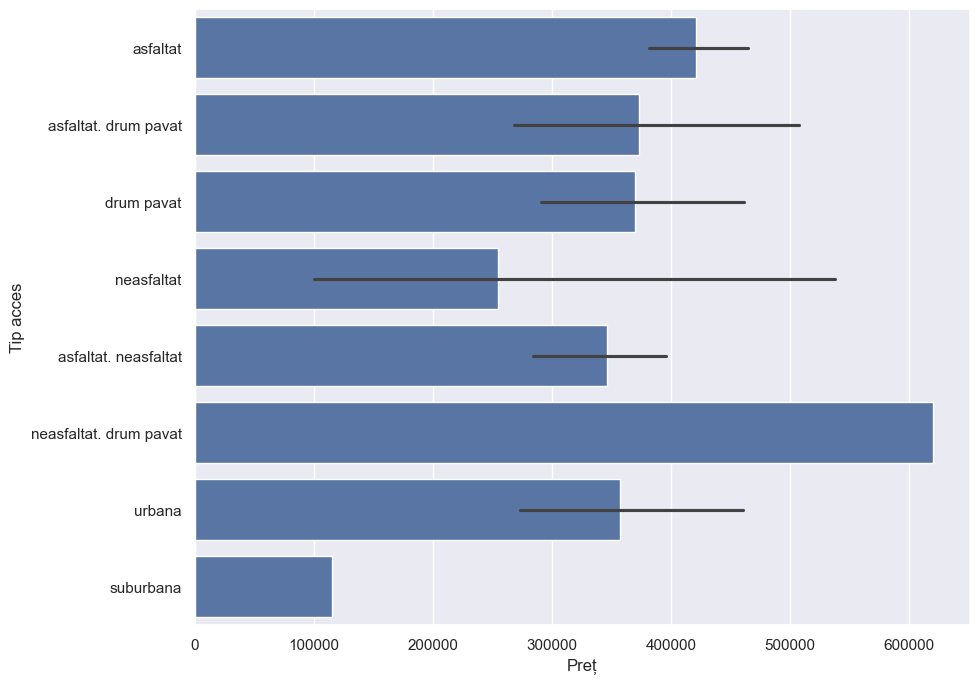

In [ ]:
sns.barplot(x="Preț", y="Tip acces", data=dfWithLabels)

<Axes: xlabel='Locație', ylabel='Preț'>

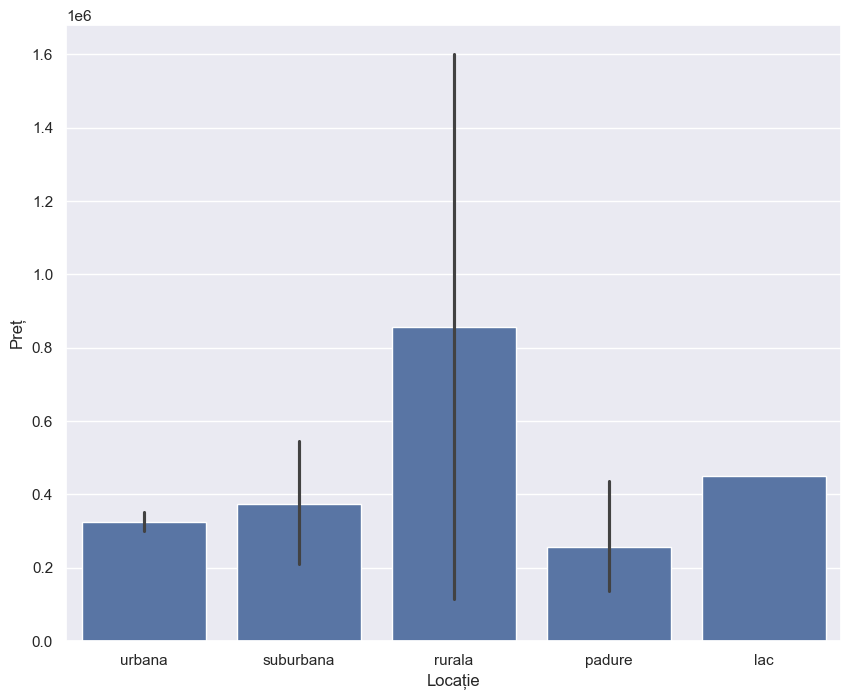

In [ ]:
sns.barplot(x="Locație", y="Preț", data=dfWithLabels)

<Axes: xlabel='Aer condiționat', ylabel='Preț'>

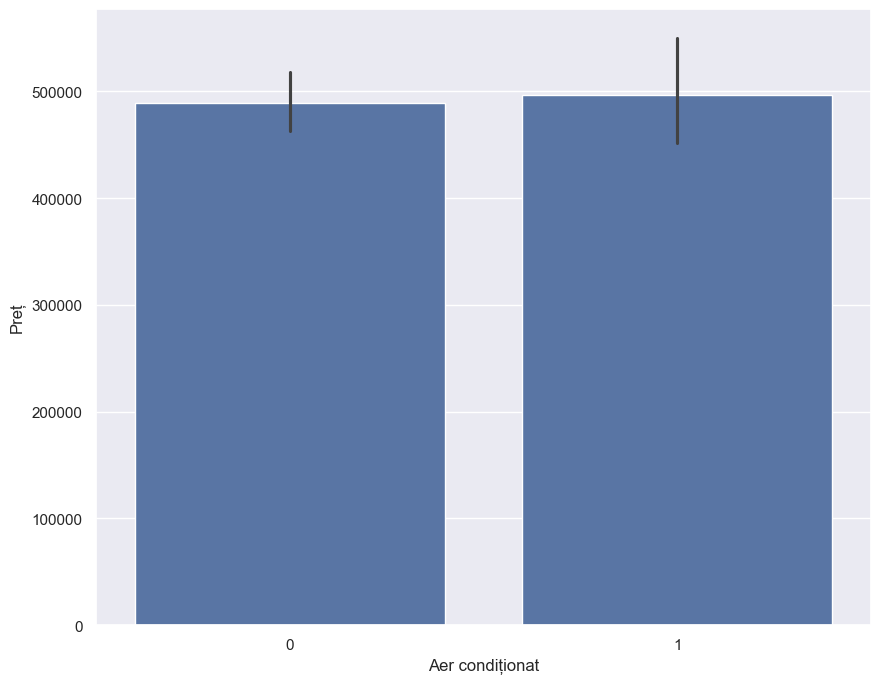

In [ ]:
sns.barplot(x="Aer condiționat", y="Preț", data=dfWithLabels)

array([[<Axes: title={'center': 'Suprafață utilă'}>,
        <Axes: title={'center': 'Tip încălzire'}>,
        <Axes: title={'center': 'Suprafață teren (m²)'}>,
        <Axes: title={'center': 'Stare'}>],
       [<Axes: title={'center': 'Anul construcției'}>,
        <Axes: title={'center': 'Numărul de camere'}>,
        <Axes: title={'center': 'Garaj/loc de parcare'}>,
        <Axes: title={'center': 'Tip proprietate'}>],
       [<Axes: title={'center': 'Material de construcție'}>,
        <Axes: title={'center': 'Numar de etaje'}>,
        <Axes: title={'center': 'Tip acoperis'}>,
        <Axes: title={'center': 'Acoperis'}>],
       [<Axes: title={'center': 'Tip mansardă'}>,
        <Axes: title={'center': 'Tip acces'}>,
        <Axes: title={'center': 'Locație'}>,
        <Axes: title={'center': 'Aer condiționat'}>],
       [<Axes: title={'center': 'Preț'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

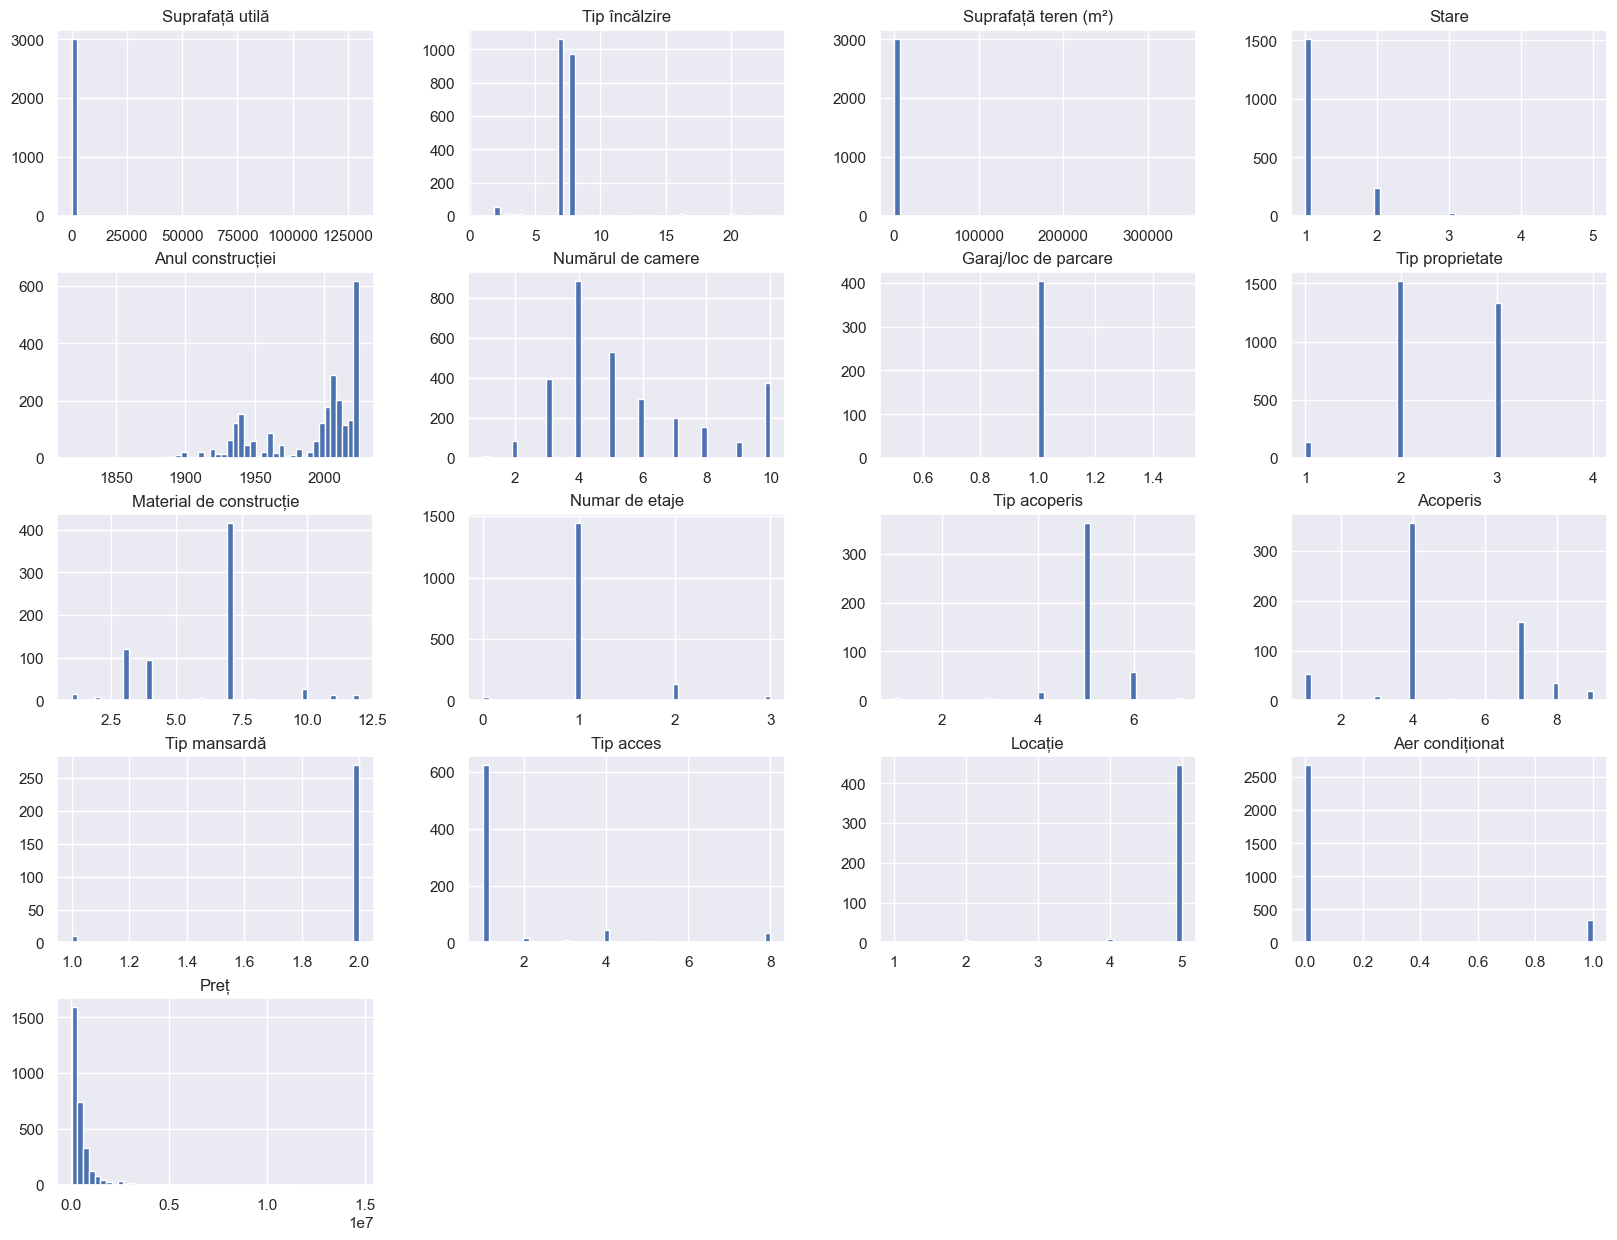

In [ ]:
df.hist(bins=50, figsize=(20,15))

In [ ]:
def removeOutliers(column, df):

    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.7)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    new_df = df[df[column] < upper_limit]
    # new_df = new_df[df[column] > lower_limit]

    return new_df

def capOutliers(column, df):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    new_df_cap = df.copy()
    new_df_cap[column] = np.where(
    new_df_cap[column] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[column] < lower_limit,
        lower_limit,
        new_df_cap[column]))
    return new_df_cap

new_df = removeOutliers("Suprafață utilă", df)
new_df = removeOutliers("Suprafață teren (m²)", new_df)
new_df = removeOutliers("Preț", new_df)
new_df_cap = capOutliers("Suprafață utilă", df)
new_df_cap = capOutliers("Suprafață teren (m²)", new_df_cap)
new_df_cap = capOutliers("Preț", new_df_cap)
new_dfShort_cap = capOutliers("Suprafață utilă", dfShort)
new_dfShort_cap = capOutliers("Suprafață teren (m²)", new_dfShort_cap)
new_dfShort_cap = capOutliers("Preț", new_dfShort_cap)

new_df.to_csv(r"..\CSVs\EditedData_df-out-removed.csv", encoding="utf-16", index=0)
new_df_cap.to_csv(r"..\CSVs\EditedData_df-cap.csv", encoding="utf-16", index=0)
new_dfShort_cap.to_csv(r"..\CSVs\EditedData_dfShort-cap.csv", encoding="utf-16", index=0)

array([[<Axes: title={'center': 'Suprafață utilă'}>,
        <Axes: title={'center': 'Tip încălzire'}>,
        <Axes: title={'center': 'Suprafață teren (m²)'}>,
        <Axes: title={'center': 'Stare'}>],
       [<Axes: title={'center': 'Anul construcției'}>,
        <Axes: title={'center': 'Numărul de camere'}>,
        <Axes: title={'center': 'Garaj/loc de parcare'}>,
        <Axes: title={'center': 'Tip proprietate'}>],
       [<Axes: title={'center': 'Material de construcție'}>,
        <Axes: title={'center': 'Numar de etaje'}>,
        <Axes: title={'center': 'Tip acoperis'}>,
        <Axes: title={'center': 'Acoperis'}>],
       [<Axes: title={'center': 'Tip mansardă'}>,
        <Axes: title={'center': 'Tip acces'}>,
        <Axes: title={'center': 'Locație'}>,
        <Axes: title={'center': 'Aer condiționat'}>],
       [<Axes: title={'center': 'Preț'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

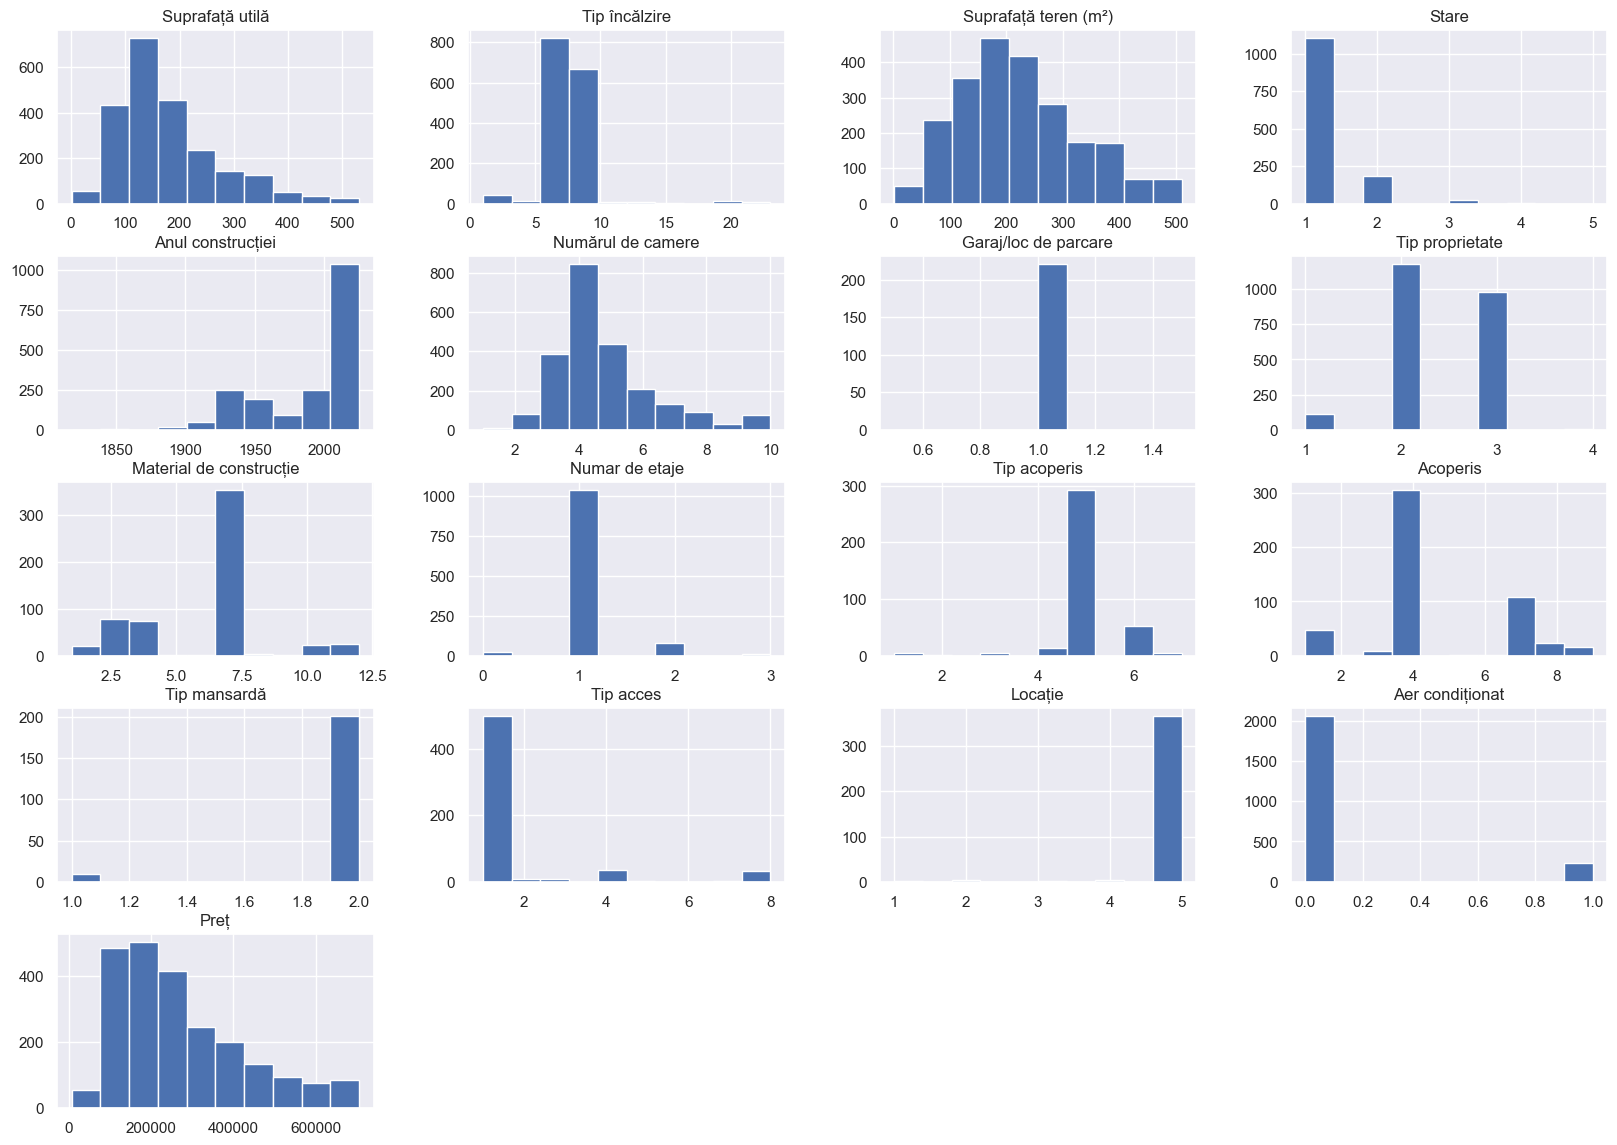

In [ ]:
new_df.hist(figsize=(20,14))

array([[<Axes: title={'center': 'Suprafață utilă'}>,
        <Axes: title={'center': 'Tip încălzire'}>,
        <Axes: title={'center': 'Suprafață teren (m²)'}>,
        <Axes: title={'center': 'Stare'}>],
       [<Axes: title={'center': 'Anul construcției'}>,
        <Axes: title={'center': 'Numărul de camere'}>,
        <Axes: title={'center': 'Garaj/loc de parcare'}>,
        <Axes: title={'center': 'Tip proprietate'}>],
       [<Axes: title={'center': 'Material de construcție'}>,
        <Axes: title={'center': 'Numar de etaje'}>,
        <Axes: title={'center': 'Tip acoperis'}>,
        <Axes: title={'center': 'Acoperis'}>],
       [<Axes: title={'center': 'Tip mansardă'}>,
        <Axes: title={'center': 'Tip acces'}>,
        <Axes: title={'center': 'Locație'}>,
        <Axes: title={'center': 'Aer condiționat'}>],
       [<Axes: title={'center': 'Preț'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

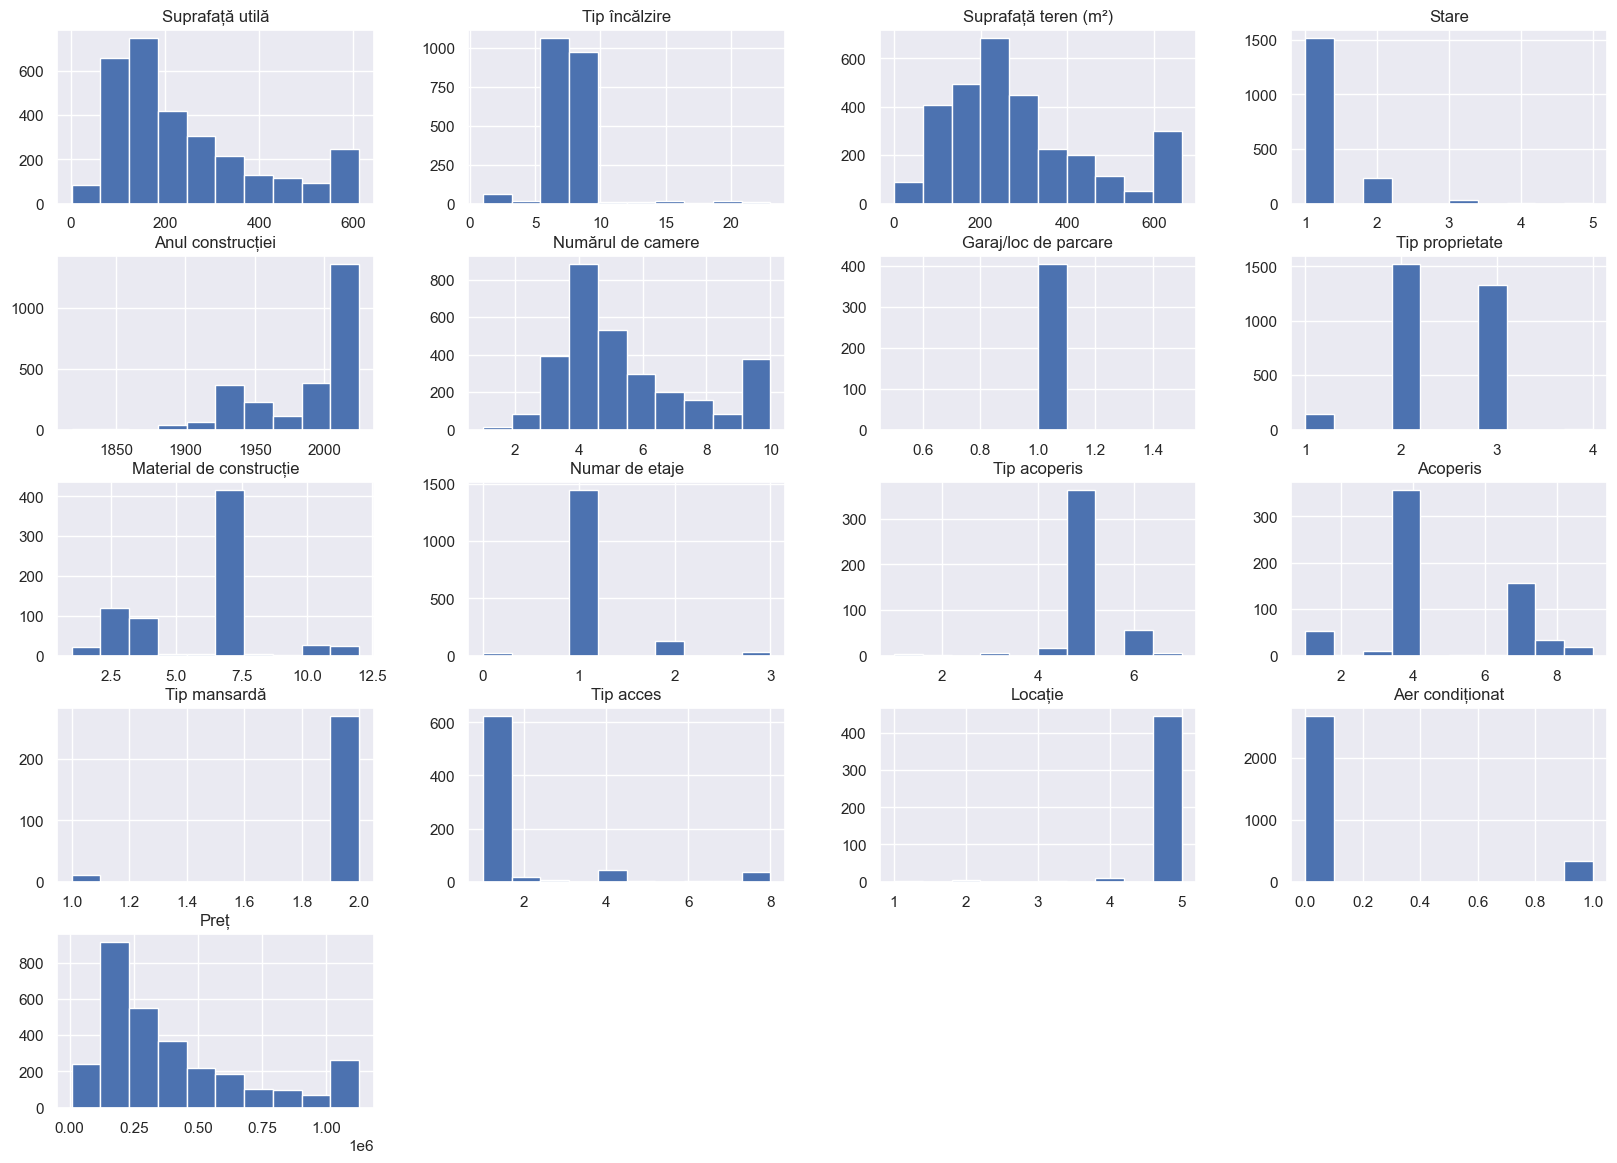

In [ ]:
new_df_cap.hist(figsize=(20,14))

array([[<Axes: title={'center': 'Suprafață utilă'}>,
        <Axes: title={'center': 'Tip încălzire'}>,
        <Axes: title={'center': 'Suprafață teren (m²)'}>],
       [<Axes: title={'center': 'Anul construcției'}>,
        <Axes: title={'center': 'Numărul de camere'}>,
        <Axes: title={'center': 'Aer condiționat'}>],
       [<Axes: title={'center': 'Preț'}>, <Axes: >, <Axes: >]],
      dtype=object)

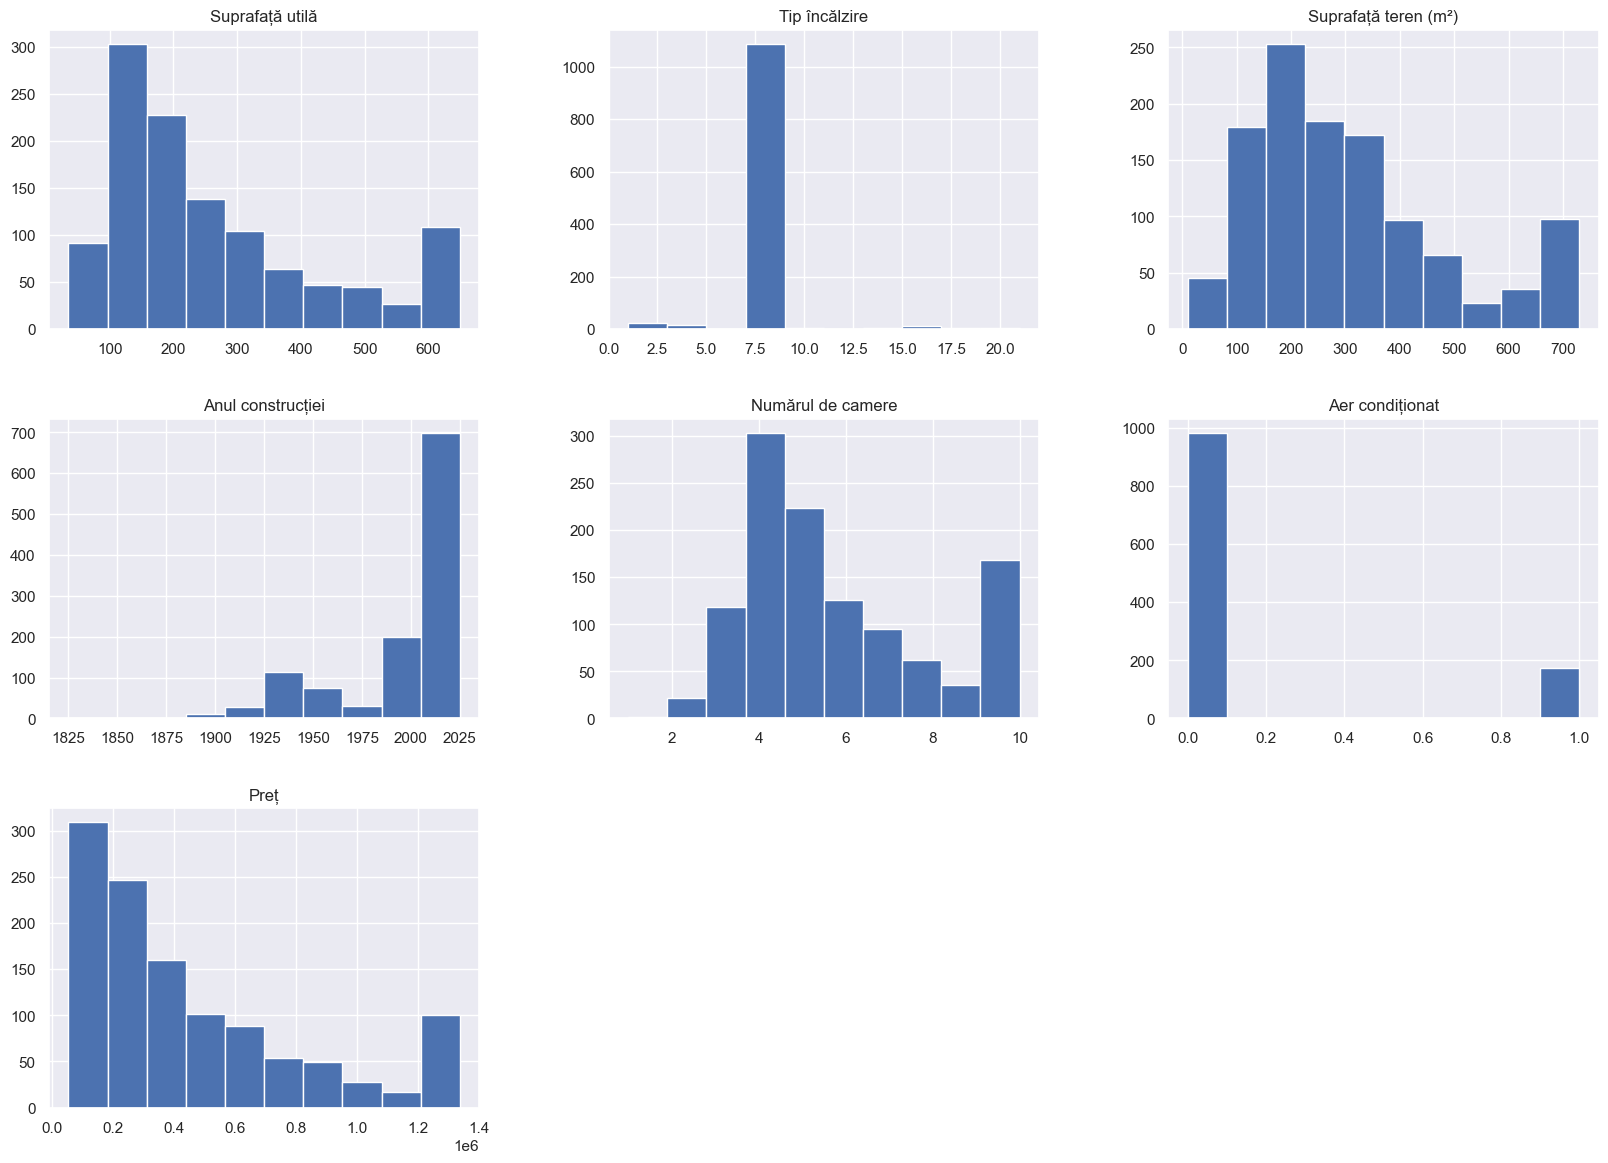

In [ ]:
new_dfShort_cap.hist(figsize=(20, 14))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = new_dfShort_cap.drop(["Preț"], axis=1)
y = new_dfShort_cap["Preț"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
lin_reg.score(X_test, y_test)

0.6574009185928769

In [ ]:
forest.score(X_test, y_test)

0.7960122082499144

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [10, 30, 50, 80],
    "max_features": [8, 10, 12, 14]
}

grid_search= GridSearchCV(forest, param_grid, cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 10, 12, 14],
                         'n_estimators': [10, 30, 50, 80]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_
grid_search.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=50)

In [ ]:
best_forest.score(X_test, y_test)

0.7998484361519278

# PyCaret implementation

In [ ]:
from unidecode import unidecode
import pandas as pd

In [ ]:
df = pd.read_csv(r"C:\Users\Ana\Desktop\House-pricing-prediction-master\CSVs\EditedData_dfShort-cap.csv", encoding="utf-16")

In [ ]:
for col in df:
    df.rename(columns = {col:unidecode(col)}, inplace = True)

In [ ]:
data = df.sample(frac=0.8).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (923, 7)
Unseen Data For Predictions: (231, 7)


In [ ]:
from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'Pret') 

,Description,Value
0,Session id,3872
1,Target,Pret
2,Target type,Regression
3,Original data shape,"(923, 7)"
4,Transformed data shape,"(923, 7)"
5,Transformed train set shape,"(646, 7)"
6,Transformed test set shape,"(277, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,119778.4076,33524032232.7554,182412.5078,0.7492,0.3666,0.3141,0.0700
et,Extra Trees Regressor,114349.7262,34512191982.5744,184984.2537,0.7425,0.3724,0.3032,0.0530
gbr,Gradient Boosting Regressor,132619.9697,38615490230.4525,195250.4699,0.7139,0.3945,0.3533,0.0330
lightgbm,Light Gradient Boosting Machine,134033.8764,40272346214.9991,199918.8118,0.7002,0.4017,0.3427,0.0430
en,Elastic Net,147097.9734,45810097561.6000,212330.0969,0.6640,0.4415,0.3964,0.0090
lar,Least Angle Regression,147373.4062,45779802931.2000,212521.8141,0.6630,0.4456,0.3956,0.0080
llar,Lasso Least Angle Regression,147373.3711,45779792896.0000,212521.7500,0.6630,0.4456,0.3956,0.0090
br,Bayesian Ridge,147249.4688,45920872857.6000,212626.0906,0.6630,0.4424,0.3967,0.0100
ridge,Ridge Regression,147368.6836,45777859584.0000,212514.7031,0.6630,0.4456,0.3956,0.0080
lasso,Lasso Regression,147373.3453,45779787776.0000,212521.7312,0.6630,0.4456,0.3956,0.0090


RandomForestRegressor(n_jobs=-1, random_state=3872)

In [ ]:
rf = create_model('rf')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:36:48
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,111176.6438,27271619107.8199,165141.2096,0.7255,0.3602,0.2876
1,100223.4628,25884196600.9483,160885.6631,0.6905,0.3343,0.2774
2,132700.5998,44163902806.0027,210152.0945,0.6837,0.3795,0.3166
3,115275.2144,30834718399.5094,175598.1731,0.7738,0.3263,0.2806
4,129803.3730,33381358578.7232,182705.6610,0.7944,0.3983,0.3631
5,140423.3862,43680085669.6191,208997.8126,0.7294,0.3859,0.3573
6,127147.2462,35379529361.2367,188094.4692,0.7605,0.3533,0.2874
7,118084.2255,30610907730.8453,174959.7317,0.7901,0.4192,0.3700
8,114224.3442,29506141586.6649,171773.5183,0.7956,0.3281,0.2621


In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,95638.2208,26228181529.3087,161951.1702,0.7360,0.3191,0.2377
1,95621.9217,25951701767.7244,161095.3189,0.6897,0.3494,0.2813
2,126845.8390,41458172351.8877,203612.8001,0.7031,0.4029,0.3419
3,113911.7890,30533664034.9430,174738.8452,0.7760,0.3529,0.2925
4,109334.3532,31368581572.8189,177111.7771,0.8068,0.3603,0.2932
5,126425.3917,45021242740.4112,212182.0981,0.7210,0.3892,0.3164
6,110644.8816,29480822376.3750,171699.8031,0.8004,0.3785,0.2733
7,125154.5493,40073236398.8533,200183.0073,0.7252,0.4451,0.3819
8,124307.2744,36335732052.8343,190619.3381,0.7483,0.3404,0.2804


Tuning the model

In [ ]:
tuned_rf = tune_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,118108.0932,31173617006.4009,176560.5194,0.6862,0.3659,0.3136
1,101255.9508,24929661505.7141,157891.2965,0.7019,0.3512,0.3001
2,150503.8597,48850759791.4419,221022.0799,0.6501,0.4123,0.3827
3,129666.5099,33184571077.6197,182166.3281,0.7566,0.3540,0.3298
4,141260.8941,40779512835.4456,201939.3791,0.7488,0.3928,0.3663
5,146891.5454,43804748840.7885,209295.8405,0.7286,0.4008,0.3877
6,144377.7246,43638170913.5737,208897.5129,0.7045,0.3889,0.3404
7,140883.2963,40450538370.5933,201123.1920,0.7226,0.4678,0.4540
8,134416.6014,36564416726.1586,191218.2437,0.7467,0.3360,0.2956


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Plot model

In [ ]:
tuned_et = tune_model(et)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:37:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,123480.4650,31064597737.7722,176251.5184,0.6873,0.4063,0.3846
1,113710.4883,27915258025.5225,167078.5983,0.6662,0.4033,0.3767
2,169946.7242,57335530828.6260,239448.3887,0.5894,0.4773,0.4674
3,155601.7403,39023428786.7010,197543.4858,0.7138,0.4171,0.4266
4,154457.2264,47526960251.3952,218006.7895,0.7072,0.4375,0.4221
5,161495.8311,48410277524.3861,220023.3568,0.7000,0.4467,0.4591
6,161671.8323,54605013770.2070,233677.1571,0.6303,0.4387,0.3939
7,155079.6271,48481655115.2968,220185.5016,0.6675,0.5252,0.5406
8,156882.3920,44425344740.0358,210773.2069,0.6922,0.4024,0.3830


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


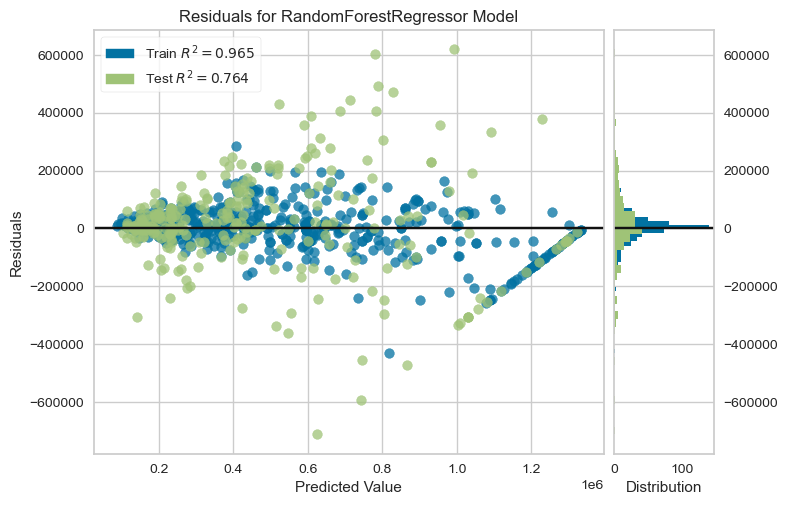

In [ ]:
plot_model(tuned_rf)

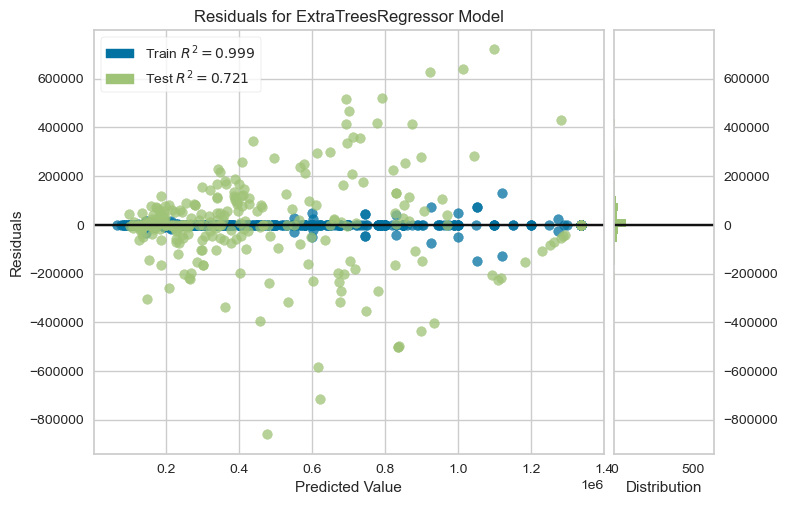

In [ ]:
plot_model(tuned_et)

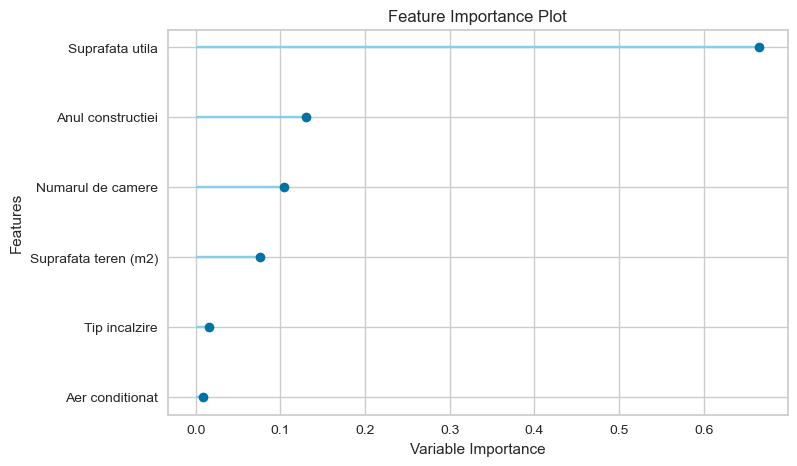

In [ ]:
plot_model(tuned_rf, plot='feature')

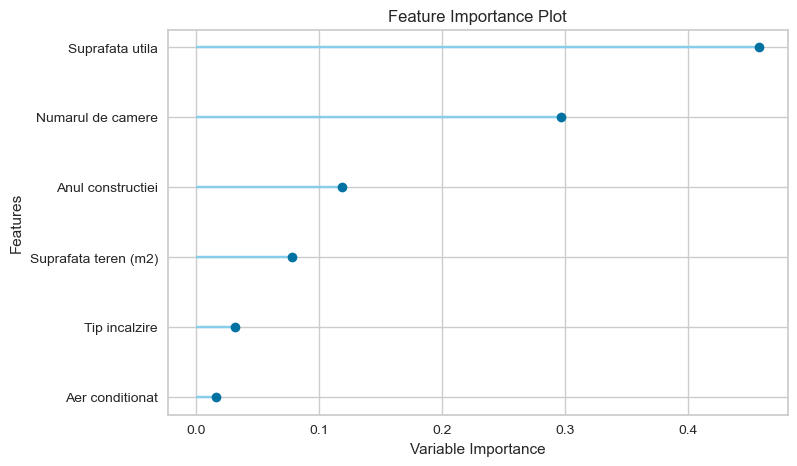

In [ ]:
plot_model(tuned_et, plot="feature")

Prediction

In [ ]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,113791.0228,29046554522.4542,170430.4976,0.7640,0.3805,0.3352


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
376,200.000000,2.0,600.0,2022.0,7.0,0,180000.0,273130.562500
162,330.000000,7.0,350.0,2022.0,5.0,0,720000.0,582610.782738
658,475.000000,7.0,420.0,2012.0,10.0,0,270000.0,714467.220643
839,649.500000,16.0,730.0,2004.0,10.0,1,990000.0,772092.180833
317,117.000000,7.0,110.0,2022.0,4.0,0,125000.0,146100.000000
...,...,...,...,...,...,...,...,...
355,325.000000,8.0,400.0,2011.0,5.0,0,285000.0,447217.880952
546,100.000000,7.0,100.0,2023.0,4.0,0,143000.0,136402.000000
664,277.000000,7.0,414.0,2007.0,6.0,1,310000.0,409369.000000
280,625.000000,7.0,400.0,2012.0,6.0,0,599000.0,620336.708333


In [ ]:
predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,113169.5653,34342566444.0380,185317.4747,0.7210,0.3861,0.3163


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
376,200.000000,2.0,600.0,2022.0,7.0,0,180000.0,360487.250000
162,330.000000,7.0,350.0,2022.0,5.0,0,720000.0,482886.000000
658,475.000000,7.0,420.0,2012.0,10.0,0,270000.0,790731.115000
839,649.500000,16.0,730.0,2004.0,10.0,1,990000.0,675000.000000
317,117.000000,7.0,110.0,2022.0,4.0,0,125000.0,140888.000000
...,...,...,...,...,...,...,...,...
355,325.000000,8.0,400.0,2011.0,5.0,0,285000.0,409272.562500
546,100.000000,7.0,100.0,2023.0,4.0,0,143000.0,130000.000000
664,277.000000,7.0,414.0,2007.0,6.0,1,310000.0,367610.000000
280,625.000000,7.0,400.0,2012.0,6.0,0,599000.0,505763.354167


In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
final_et = finalize_model(tuned_et)

In [ ]:
predict_model(final_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,40841.5925,4112732223.0706,64130.5873,0.9666,0.1755,0.1229


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
376,200.000000,2.0,600.0,2022.0,7.0,0,180000.0,212569.000000
162,330.000000,7.0,350.0,2022.0,5.0,0,720000.0,679343.458333
658,475.000000,7.0,420.0,2012.0,10.0,0,270000.0,427436.667500
839,649.500000,16.0,730.0,2004.0,10.0,1,990000.0,860240.025833
317,117.000000,7.0,110.0,2022.0,4.0,0,125000.0,131743.000000
...,...,...,...,...,...,...,...,...
355,325.000000,8.0,400.0,2011.0,5.0,0,285000.0,298705.833333
546,100.000000,7.0,100.0,2023.0,4.0,0,143000.0,137606.190476
664,277.000000,7.0,414.0,2007.0,6.0,1,310000.0,341375.000000
280,625.000000,7.0,400.0,2012.0,6.0,0,599000.0,626632.250000


In [ ]:
predict_model(final_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1069.1697,93431534.9779,9665.9989,0.9992,0.0131,0.0025


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
376,200.000000,2.0,600.0,2022.0,7.0,0,180000.0,180000.0
162,330.000000,7.0,350.0,2022.0,5.0,0,720000.0,720000.0
658,475.000000,7.0,420.0,2012.0,10.0,0,270000.0,270000.0
839,649.500000,16.0,730.0,2004.0,10.0,1,990000.0,832500.0
317,117.000000,7.0,110.0,2022.0,4.0,0,125000.0,125000.0
...,...,...,...,...,...,...,...,...
355,325.000000,8.0,400.0,2011.0,5.0,0,285000.0,285000.0
546,100.000000,7.0,100.0,2023.0,4.0,0,143000.0,136500.0
664,277.000000,7.0,414.0,2007.0,6.0,1,310000.0,310000.0
280,625.000000,7.0,400.0,2012.0,6.0,0,599000.0,599000.0


In [ ]:
unseen_predictions = predict_model(final_rf, data = data_unseen)
unseen_predictions.head()

,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,112.000000,7.0,143.0,1936.0,4.0,1,199000.0,197607.596667
1,60.000000,8.0,27.0,1940.0,3.0,0,79000.0,138701.600000
2,212.000000,7.0,207.0,2023.0,4.0,0,450000.0,370822.000000
3,229.000000,8.0,212.0,2023.0,5.0,0,481600.0,414591.000000
4,131.889999,7.0,115.0,1950.0,8.0,0,235000.0,233645.430000


In [ ]:
unseen_predictions = predict_model(final_et, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,24390.2104,5860243511.5541,76552.2273,0.9478,0.1724,0.0701


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,112.000000,7.0,143.0,1936.0,4.0,1,199000.0,199000.0
1,60.000000,8.0,27.0,1940.0,3.0,0,79000.0,151759.0
2,212.000000,7.0,207.0,2023.0,4.0,0,450000.0,450000.0
3,229.000000,8.0,212.0,2023.0,5.0,0,481600.0,481600.0
4,131.889999,7.0,115.0,1950.0,8.0,0,235000.0,234500.0
